In [136]:
import lightgbm as lgb
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import accuracy_score, f1_score, make_scorer, cohen_kappa_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import learning_curve, ShuffleSplit

In [137]:
# Parse results data
results = pd.DataFrame()

for path in pathlib.Path('/Users/sam/Documents/projects/premier_league_predictions/data').rglob("*.csv"):
    data = pd.read_csv(path)
    results = pd.concat([results, data])
    
# Remove missing values    
results = results[results.result.values != 'pp']
results = results[~pd.isnull(results.result.values)]
results = results.drop(['Unnamed: 0','result_x','result_y'], axis=1)

In [138]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [139]:
results.shape

(2491, 15)

In [140]:
X = results.loc[:, results.columns != 'result'].values
#imp.fit(X)

#X = imp.transform(X)

y = results.iloc[:, -1].values

In [141]:
y_values = []

for value in y:
    if value == "home":
        y_values.append(0)
    elif value == "away":
        y_values.append(1)
    else:
        y_values.append(2)
        
y = y_values

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [143]:
parameters={"early_stopping_rounds":20, 
            "eval_metric" : 'multi_logloss', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [144]:
parameter_tuning ={
             'max_depth': sp_randint(1,5),
             'num_leaves': sp_randint(1, 5), 
             'learning_rate ': [1,0.1,0.01,0.001],
             'min_child_samples': sp_randint(20, 50), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [145]:
scorer = make_scorer(f1_score, average = 'weighted')

In [146]:
classifier = LGBMClassifier(random_state=300, silent=True, metric='None', n_jobs=4, n_estimators=10000)

find_parameters = RandomizedSearchCV(
    estimator=classifier, param_distributions=parameter_tuning, 
    n_iter=1000,
    scoring=scorer,
    cv=5,
    refit=True,
    random_state=300,
    verbose=False)

In [147]:
find_parameters.fit(X_train, y_train, **parameters)
print('Best score : {} with parameters: {} '.format(find_parameters.best_score_, find_parameters.best_params_))

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06544
[200]	valid's multi_logloss: 1.04178
[300]	valid's multi_logloss: 1.0365
[400]	valid's multi_logloss: 1.03556
[500]	valid's multi_logloss: 1.03539
[600]	valid's multi_logloss: 1.03533
[700]	valid's multi_logloss: 1.0353
[800]	valid's multi_logloss: 1.03529
[900]	valid's multi_logloss: 1.03529
[1000]	valid's multi_logloss: 1.03529
[1100]	valid's multi_logloss: 1.03529
[1200]	valid's multi_logloss: 1.03529
[1300]	valid's multi_logloss: 1.03529
[1400]	valid's multi_logloss: 1.03529
[1500]	valid's multi_logloss: 1.03529
[1600]	valid's multi_logloss: 1.03529
[1700]	valid's multi_logloss: 1.03529
[1800]	valid's multi_logloss: 1.03529
[1900]	valid's multi_logloss: 1.03529
[2000]	valid's multi_logloss: 1.03529
[2100]	valid's multi_logloss: 1.03529
[2200]	valid's multi_logloss: 1.03529
Early stopping, best iteration is:
[2203]	valid's multi_logloss: 1.03529
Training until validation scores don't im

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.06337
[400]	valid's multi_logloss: 1.06337
[500]	valid's multi_logloss: 1.06337
Early stopping, best iteration is:
[495]	valid's multi_logloss: 1.06337
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06324
[200]	valid's multi_logloss: 1.06308
[300]	valid's multi_logloss: 1.06308
[400]	valid's multi_logloss: 1.06308
Early stopping, best iteration is:
[473]	valid's multi_logloss: 1.06308
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06427
[200]	valid's multi_logloss: 1.06406
[300]	valid's multi_logloss: 1.06405
[400]	valid's multi_logloss: 1.06405
[500]	valid's multi_logloss: 1.06405
Early stopping, best iteration is:
[520]	valid's multi_logloss: 1.06405
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06215
[200]	valid's multi_logloss: 1.06196
[300]	valid's multi_logloss: 1.06195
[400]	valid's multi_logloss: 1.06195
[500]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.066
[200]	valid's multi_logloss: 1.06588
[300]	valid's multi_logloss: 1.06588
[400]	valid's multi_logloss: 1.06588
Early stopping, best iteration is:
[380]	valid's multi_logloss: 1.06588
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06711
[200]	valid's multi_logloss: 1.06696
[300]	valid's multi_logloss: 1.06696
[400]	valid's multi_logloss: 1.06696
Early stopping, best iteration is:
[397]	valid's multi_logloss: 1.06696
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06674
[200]	valid's multi_logloss: 1.06661
[300]	valid's multi_logloss: 1.06661
[400]	valid's multi_logloss: 1.06661
Early stopping, best iteration is:
[478]	valid's multi_logloss: 1.06661
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06518
[200]	valid's multi_logloss: 1.06489
[300]	valid's multi_logloss: 1.06488
[400]	valid's multi_logloss: 1.06488
Early stopp

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[63]	valid's multi_logloss: 0.994668
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00449
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00034
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00149
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00008
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06344
[200]	valid's multi_logloss: 1.0412
[300]	valid's multi_logloss: 1.03656
[400]	valid's multi_logloss: 1.03564
[500]	valid's multi_logloss: 1.0355
[600]	valid's multi_logloss: 1.03543
[700]	valid's multi_logloss: 1.03541
[800]	valid's multi_logloss: 1.0354
[900]	valid's multi_logloss: 1.03539
[1000]	valid's multi_logloss: 1.03539
[1100]	valid's multi_logloss: 1.03539
[1200]	valid's multi_logloss

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06614
[200]	valid's multi_logloss: 1.06592
[300]	valid's multi_logloss: 1.06591
[400]	valid's multi_logloss: 1.06591
Early stopping, best iteration is:
[397]	valid's multi_logloss: 1.06591
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06718
[200]	valid's multi_logloss: 1.06692
[300]	valid's multi_logloss: 1.06691
[400]	valid's multi_logloss: 1.06691
[500]	valid's multi_logloss: 1.06691
[600]	valid's multi_logloss: 1.06691
Early stopping, best iteration is:
[603]	valid's multi_logloss: 1.06691
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06695
[200]	valid's multi_logloss: 1.06668
[300]	valid's multi_logloss: 1.06667
[400]	valid's multi_logloss: 1.06667
[500]	valid's multi_logloss: 1.06667
[600]	valid's multi_logloss: 1.06667
[700]	valid's multi_logloss: 1.06667
[800]	valid's multi_logloss: 1.06667
[900]	v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00148
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 0.993481
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid's multi_logloss: 1.00217
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00468
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.997944
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0018
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00142
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997798
Early stopping, best iteration is:
[138]	valid's multi_logloss: 0.9970

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00364
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 1.00034
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 1.0031
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00553
Early stopping, best iteration is:
[165]	valid's multi_logloss: 1.00335
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00278
Early stopping, best iteration is:
[151]	valid's multi_logloss: 1.0001
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00585
Early stopping, best iteration is:
[144]	valid's multi_logloss: 1.00312
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00429
Early stopping, best iteration is:
[143]	valid's multi_logl

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00231
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 0.998154
Training until validation scores don't improve for 20 rounds
Early stopping, bes

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00366
Early stopping, best iteration is:
[163]	valid's multi_logloss: 1.00137
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00017
Early stopping, best iteration is:
[159]	valid's multi_logloss: 0.99776
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00561
Early stopping, best iteration is:
[155]	valid's multi_logloss: 1.00491
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00283
Early stopping, best iteration is:
[158]	valid's multi_logloss: 1.0013
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00484
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.0032
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00288
Training until validation scores don't improve for 20 rounds
Early stopping, best

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[41]	valid's multi_logloss: 1.00076
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00172
Early stopping, best iteration is:
[92]	valid's multi_logloss: 1.00158
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99724
Early s

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00471
Early stopping, best iteration is:
[91]	valid's multi_logloss: 1.00434
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00176
Early stopping, best iteration is:
[95]	valid's multi_logloss: 1.00157
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00371
Early stopping, best iteration is:
[91]	valid's multi_logloss: 1.0035
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00117
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid's multi_logloss: 0.996904
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid's multi_logloss: 1.00726


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00208
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00181
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00121
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00379
[200]	valid's multi_logloss: 1.00125
Early stopping, best iteration is:
[181]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0005
Early stopping, best iteration is:
[175]	valid's multi_logloss: 0.997993
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00605
Early stopping, best iteration is:
[146]	valid's multi_logloss: 1.00499
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00283
[200]	valid's multi_logloss: 1.0011
Early stopping, be

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[59]	valid's multi_logloss: 1.0053
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00396
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid's multi_logloss: 1.00557
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06322
[200]	valid's multi_logloss: 1.06318
[300]	valid's multi_logloss: 1.06318
[400]	valid's multi_logloss: 1.06318
[500]	valid's multi_logloss: 1.06318
[600]	valid's multi_logloss: 1.06318
[700]	valid's multi_logloss: 1.06318
[800]	valid's multi_logloss: 1.06318
Early stopping, best iteration is:
[846]	valid's multi_logloss: 1.06318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0635
[200]	valid's multi_logloss: 1.06346
[300]	valid's multi_logloss: 1.06346
[400]	valid's multi_logloss: 1.06346
[500]	valid's multi_logloss: 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[500]	valid's multi_logloss: 1.03401
[600]	valid's multi_logloss: 1.03401
[700]	valid's multi_logloss: 1.034
[800]	valid's multi_logloss: 1.034
[900]	valid's multi_logloss: 1.034
[1000]	valid's multi_logloss: 1.034
[1100]	valid's multi_logloss: 1.034
[1200]	valid's multi_logloss: 1.034
[1300]	valid's multi_logloss: 1.034
[1400]	valid's multi_logloss: 1.034
Early stopping, best iteration is:
[1400]	valid's multi_logloss: 1.034
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03009
[200]	valid's multi_logloss: 1.02898
[300]	valid's multi_logloss: 1.02868
[400]	valid's multi_logloss: 1.02862
[500]	valid's multi_logloss: 1.0286
[600]	valid's multi_logloss: 1.0286
[700]	valid's multi_logloss: 1.0286
[800]	valid's multi_logloss: 1.0286
[900]	valid's multi_logloss: 1.0286
[1000]	valid's multi_logloss: 1.0286
[1100]	valid's multi_logloss: 1.0286
[1200]	valid's multi_logloss: 1.0286
[1300]	valid's multi_logloss: 1.0286
[1400]	valid's multi_logloss: 1.0

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0623
Early stopping, best iteration is:
[97]	valid's multi_logloss: 1.0623
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06082
[200]	valid's multi_logloss: 1.06069
[300]	valid's multi_logloss: 1.06069
[400]	valid's multi_logloss: 1.06069
[500]	valid's multi_logloss: 1.06069
Early stopping, best iteration is:
[561]	valid's multi_logloss: 1.06069
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06288
[200]	valid's multi_logloss: 1.06276
[300]	valid's multi_logloss: 1.06276
[400]	valid's multi_logloss: 1.06276
[500]	valid's multi_logloss: 1.06276
Early stopping, best iteration is:
[536]	valid's multi_logloss: 1.06276
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06098
[200]	valid's multi_logloss: 1.06082
[300]	valid's multi_logloss: 1.06081
[400]	valid's multi_loglo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.06317
[200]	valid's multi_logloss: 1.06314
[300]	valid's multi_logloss: 1.06314
Early stopping, best iteration is:
[368]	valid's multi_logloss: 1.06314
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06423
[200]	valid's multi_logloss: 1.06418
[300]	valid's multi_logloss: 1.06418
Early stopping, best iteration is:
[338]	valid's multi_logloss: 1.06418
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06285
[200]	valid's multi_logloss: 1.06285
[300]	valid's multi_logloss: 1.06285
Early stopping, best iteration is:
[310]	valid's multi_logloss: 1.06285
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid's multi_logloss: 1.06338
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00474
[200]	valid's multi_logloss: 1.0019
Early stopping, best iteration is:
[196]	valid's multi_logloss:

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00378
[200]	valid's multi_logloss: 0.999806
[300]	valid's multi_logloss: 0.999312
[400]	valid's multi_logloss: 0.999214
Early stopping, best iteration is:
[426]	valid's multi_logloss: 0.999192
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00743
[200]	valid's multi_logloss: 1.00437
[300]	valid's multi_logloss: 1.004
Early stopping, best iteration is:
[294]	valid's multi_logloss: 1.00397
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00382
[200]	valid's multi_logloss: 1.00143
[300]	valid's multi_logloss: 1.00091
[400]	valid's multi_logloss: 1.00074
Early stopping, best iteration is:
[423]	valid's multi_logloss: 1.00072
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00706
[200]	valid's multi_logloss: 1.00421
Early stopping, best iteration is:
[248]	valid's multi_lo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00054
Early stopping, best iteration is:
[168]	valid's multi_logloss: 0.997896
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00592
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00498
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00284
[200]	valid's multi_logloss: 1.00119
Early stopping, best iteration is:
[197]	valid's multi_logloss: 1.00112
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00523
Early stopping, best iteration is:
[166]	valid's multi_logloss: 1.0034
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999456
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.99494
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00317
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00123
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid's multi_logloss: 0.998516
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00194


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[104]	valid's multi_logloss: 1.00189
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997306
Early stopping, best iteration is:
[98]	valid's multi_logloss: 0.99698
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00458
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00411
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00117
Early stopping, best iteration is:
[94]	valid's multi_logloss: 1.00072
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00303
Early stopping, best iteration is:
[103]	valid's multi_logloss: 1.00277
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logl

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.00174
Early stopping, best iteration is:
[339]	valid's multi_logloss: 1.00163
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00348
[200]	valid's multi_logloss: 0.999506
[300]	valid's multi_logloss: 0.999048
[400]	valid's multi_logloss: 0.998971
Early stopping, best iteration is:
[396]	valid's multi_logloss: 0.998965
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00722
[200]	valid's multi_logloss: 1.00419
Early stopping, best iteration is:
[271]	valid's multi_logloss: 1.0038
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0036
[200]	valid's multi_logloss: 1.0015
[300]	valid's multi_logloss: 1.00096
[400]	valid's multi_logloss: 1.00079
[500]	valid's multi_logloss: 1.00074
Early stopping, best iteration is:
[496]	valid's multi_logloss: 1.00074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_log

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0021
Early stopping, best iteration is:
[120]	valid's multi_logloss: 1.00147
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.997115
Early stopping, best iteration is:
[124]	valid's multi_logloss: 0.996384
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00501
Early stopping, best iteration is:
[110]	valid's multi_logloss: 1.00443
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00156
Early stopping, best iteration is:
[99]	valid's multi_logloss: 1.00122
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00296
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.00292
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03658
[200]	valid's multi_logloss: 1.03463
[300]	valid's multi_logloss: 1.03416
[400]	valid's multi_logloss: 1.034
[500]	valid's multi_logloss: 1.03394
[600]	valid's multi_logloss: 1.03391
[700]	valid's multi_logloss: 1.0339
[800]	valid's multi_logloss: 1.0339
[900]	valid's multi_logloss

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.0048
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00226
Early stopping, best iteration is:
[168]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00432
Early stopping, best iteration is:
[134]	valid's multi_logloss: 1.0032
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00149
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995062
Early stopping, best iteration is:
[98]	valid's multi_logloss: 0.994925
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00601
Early stopping, best iteration is:
[87]	valid's multi_logloss: 1.00536
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.995366
Early stopping, best iteration is:
[101]	valid's multi_logloss: 0.995323
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid's multi_logloss: 1.00184
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid's multi_logloss: 1.00047
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00055
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.0005
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00219
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid's multi_logloss: 0.995494
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00322
Training until validation scores don't improve for 20 rounds

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03103
[200]	valid's multi_logloss: 1.02924
[300]	valid's multi_logloss: 1.02896
[400]	valid's multi_logloss: 1.0289
[500]	valid's multi_logloss: 1.02889
[600]	valid's multi_logloss: 1.02889
[700]	valid's multi_logloss: 1.02888
[800]	valid's multi_logloss: 1.02888
[900]	valid's multi_logloss: 1.02888
[1000]	valid's multi_logloss: 1.02888
[1100]	valid's multi_logloss: 1.02888
[1200]	valid's multi_logloss: 1.02888
Early stopping, best iteration is:
[1208]	valid's multi_logloss: 1.02888
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03466
[200]	valid's multi_logloss: 1.03155
[300]	valid's multi_logloss: 1.03094
[400]	valid's multi_logloss: 1.03079
[500]	valid's multi_logloss: 1.03075
[600]	valid's multi_logloss: 1.03073
[700]	valid's multi_logloss: 1.03073
[800]	valid's multi_logloss: 1.03073
[900]	valid's multi_logloss: 1.03073
[1000]	valid's multi_loglo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00199
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 0.998707
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00613
[200]	valid's multi_logloss: 1.00171
Early stopping, best iteration is:
[250]	valid's multi_logloss: 1.00142
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00337
[200]	valid's multi_logloss: 0.998518
Early stopping, best iteration is:
[211]	valid's multi_logloss: 0.998381
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00735
[200]	valid's multi_logloss: 1.00481
Early stopping, best iteration is:
[180]	valid's multi_logloss: 1.00476
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00335
[200]	valid's 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[500]	valid's multi_logloss: 1.0341
[600]	valid's multi_logloss: 1.03401
[700]	valid's multi_logloss: 1.03398
[800]	valid's multi_logloss: 1.03397
[900]	valid's multi_logloss: 1.03397
[1000]	valid's multi_logloss: 1.03396
[1100]	valid's multi_logloss: 1.03396
[1200]	valid's multi_logloss: 1.03396
[1300]	valid's multi_logloss: 1.03396
[1400]	valid's multi_logloss: 1.03396
[1500]	valid's multi_logloss: 1.03396
[1600]	valid's multi_logloss: 1.03396
[1700]	valid's multi_logloss: 1.03396
[1800]	valid's multi_logloss: 1.03396
[1900]	valid's multi_logloss: 1.03396
[2000]	valid's multi_logloss: 1.03396
[2100]	valid's multi_logloss: 1.03396
[2200]	valid's multi_logloss: 1.03396
[2300]	valid's multi_logloss: 1.03396
[2400]	valid's multi_logloss: 1.03396
Early stopping, best iteration is:
[2420]	valid's multi_logloss: 1.03396
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0603
[200]	valid's multi_logloss: 1.03466
[300]	valid's multi_logloss: 1.02951
[4

Early stopping, best iteration is:
[40]	valid's multi_logloss: 1.00191
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid's multi_logloss: 0.995636
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00261
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.00208
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00058
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00218
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 0.996427
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.00266
Tra

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00386
Early stopping, best iteration is:
[125]	valid's multi_logloss: 1.00298
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999672
Early stopping, best iteration is:
[133]	valid's multi_logloss: 0.999268
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00398
Early stopping, best iteration is:
[95]	valid's multi_logloss: 1.00384
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00345
Early stopping, best iteration is:
[132]	valid's multi_logloss: 1.00261
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00466
Early stopping, best iteration is:
[95]	valid's multi_logloss: 1.00447


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00363
[200]	valid's multi_logloss: 1.00173
Early stopping, best iteration is:
[218]	valid's multi_logloss: 1.00151
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00085
[200]	valid's multi_logloss: 0.997777
Ea

[1300]	valid's multi_logloss: 1.02801
[1400]	valid's multi_logloss: 1.02801
[1500]	valid's multi_logloss: 1.02801
[1600]	valid's multi_logloss: 1.02801
[1700]	valid's multi_logloss: 1.02801
[1800]	valid's multi_logloss: 1.02801
[1900]	valid's multi_logloss: 1.02801
[2000]	valid's multi_logloss: 1.02801
Early stopping, best iteration is:
[2026]	valid's multi_logloss: 1.02801
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03414
[200]	valid's multi_logloss: 1.03278
[300]	valid's multi_logloss: 1.03239
[400]	valid's multi_logloss: 1.03227
[500]	valid's multi_logloss: 1.03223
[600]	valid's multi_logloss: 1.03221
[700]	valid's multi_logloss: 1.03221
[800]	valid's multi_logloss: 1.0322
[900]	valid's multi_logloss: 1.0322
[1000]	valid's multi_logloss: 1.0322
[1100]	valid's multi_logloss: 1.0322
[1200]	valid's multi_logloss: 1.0322
[1300]	valid's multi_logloss: 1.0322
[1400]	valid's multi_logloss: 1.0322
[1500]	valid's multi_logloss: 1.0322
[1600]	va

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00338
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00277
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid's multi_logloss: 1.00445
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00419
[200]	valid's multi_logloss: 1.00184
Early stopping, best iteration is:
[183]	valid's multi_logloss: 1.00149
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00112
Early stopping, best iteration is:
[158]	valid's multi_logloss: 0.997399
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00546
Early stopping, best iteration is:
[154]	valid's multi_logloss: 1.00399
Training until validation scores don't improve for 20 ro

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 0.999676
Early stopping, best iteration is:
[182]	valid's multi_logloss: 0.999356
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00391
Early stopping, best iteration is:
[122]	valid's multi_logloss: 1.00329
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00363
Early stopping, best iteration is:
[146]	valid's multi_logloss: 1.00261
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00513
Early stopping, best iteration is:
[118]	valid's multi_logloss: 1.00464
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00156
Early stopping, best iteration is:
[95]	valid's multi_logloss: 1.00127
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995508
Early stopping, best iteration is:
[125]	valid's multi_logloss: 0.995229
Training until validation scores don't

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00183
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99513
Early stopping, best iteration is:
[91]	valid's multi_logloss: 0.994699
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.00224
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.00167
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid's multi_logloss: 0.999656
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00786
[200]	valid's multi_logloss: 1.00252
[300]	valid's multi_logloss: 1.0015
Early stopping, best iteration is:
[288]	valid's multi_logloss: 1.00147
Training until validation scores don't improve for 20 roun

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0399
[200]	valid's multi_logloss: 1.03768
[300]	valid's multi_logloss: 1.03732
[400]	valid's multi_logloss: 1.03727
[500]	valid's multi_logloss: 1.03726
[600]	valid's multi_logloss: 1.03726
[700]	valid's multi_logloss: 1.03726
[800]	valid's multi_logloss: 1.03726
[900]	valid's multi_logloss: 1.03726
[1000]	valid's multi_logloss: 1.03726
[1100]	valid's multi_logloss: 1.03726
[1200]	valid's multi_logloss: 1.03726
[1300]	valid's multi_logloss: 1.03726
[1400]	valid's multi_logloss: 1.03726
Early stopping, best iteration is:
[1473]	valid's multi_logloss: 1.03726
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03542
[200]	valid's multi_logloss: 1.03329
[300]	valid's multi_logloss: 1.03299
[400]	valid's multi_logloss: 1.03295
[500]	valid's multi_logloss: 1.03295
[600]	valid's multi_logloss: 1.03295
[700]	valid's multi_logloss: 1.03295
[800]	valid's multi_logl

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00223
Early stopping, best iteration is:
[99]	valid's multi_logloss: 1.0022
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997317
Early stopping, best iteration is:
[105]	valid's multi_logloss: 0.997161
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00414
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00387
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00018
Early stopping, best iteration is:
[94]	valid's multi_logloss: 0.999704
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00312
Early stopping, best iteration is:
[93]	valid's multi_logloss: 1.0028
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[60]	valid's multi_logloss: 1.00163
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996859
Early stopping, best iteration is:
[86]	valid's multi_logloss: 0.995911
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid's multi_logloss: 1.00749
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00126
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00257
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00215
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00179
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.00168
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996879
Early stopping, best iteration is:
[121]	valid's multi_l

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06035
[200]	valid's multi_logloss: 1.04014
[300]	valid's multi_logloss: 1.03597
[400]	valid's multi_logloss: 1.0351
[500]	valid's multi_logloss: 1.03496
[600]	valid's multi_logloss: 1.03493
[700]	valid's multi_logloss: 1.03492
[800]	valid's multi_logloss: 1.03491
[900]	valid's multi_logloss: 1.03491
[1000]	valid's multi_logloss: 1.03491
[1100]	valid's multi_logloss: 1.03491
[1200]	valid's multi_logloss: 1.03491
[1300]	valid's multi_logloss: 1.03491
[1400]	valid's multi_logloss: 1.03491
[1500]	valid's multi_logloss: 1.03491
[1600]	valid's multi_logloss: 1.03491
[1700]	valid's multi_logloss: 1.03491
[1800]	valid's multi_logloss: 1.03491
Early stopping, best iteration is:
[1815]	valid's multi_logloss: 1.03491
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06345
[200]	valid's multi_logloss: 1.06333
[300]	val

[100]	valid's multi_logloss: 1.00284
Early stopping, best iteration is:
[80]	valid's multi_logloss: 1.00185
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00062
Early stopping, best iteration is:
[85]	valid's multi_logloss: 1.00032
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00127
Early stopping, best iteration is:
[94]	valid's multi_logloss: 1.00078
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00634
[200]	valid's multi_logloss: 1.00399
[300]	valid's multi_logloss: 1.00346
Early stopping, best iteration is:
[351]	valid's multi_logloss: 1.00329
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0028
Early stopping, best iteration is:
[167]	valid's multi_logloss: 1.00071
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00612
Early stopping, best iteration is:
[175]	va

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00194
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.0008
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.99843
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training un

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[500]	valid's multi_logloss: 1.03803
[600]	valid's multi_logloss: 1.03802
[700]	valid's multi_logloss: 1.03802
[800]	valid's multi_logloss: 1.03802
[900]	valid's multi_logloss: 1.03802
Early stopping, best iteration is:
[904]	valid's multi_logloss: 1.03802
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03452
[200]	valid's multi_logloss: 1.03226
[300]	valid's multi_logloss: 1.03195
[400]	valid's multi_logloss: 1.03191
[500]	valid's multi_logloss: 1.0319
[600]	valid's multi_logloss: 1.0319
[700]	valid's multi_logloss: 1.0319
[800]	valid's multi_logloss: 1.0319
[900]	valid's multi_logloss: 1.0319
[1000]	valid's multi_logloss: 1.0319
[1100]	valid's multi_logloss: 1.0319
[1200]	valid's multi_logloss: 1.0319
Early stopping, best iteration is:
[1225]	valid's multi_logloss: 1.0319
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03353
[200]	valid's multi_logloss: 1.03155
[300]	valid's multi_logloss: 1.03133

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00177
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00198
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995624
Early stopping, best iteration is:
[82]	valid's multi_logloss: 0.994527
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid's multi_logloss: 1.00525
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00033
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00177
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00082
Training until validation scores don'

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.00568
[300]	valid's multi_logloss: 1.00503
[400]	valid's multi_logloss: 1.00475
[500]	valid's multi_logloss: 1.00462
[600]	valid's multi_logloss: 1.00456
[700]	valid's multi_logloss: 1.00449
[800]	valid's multi_logloss: 1.00444
[900]	valid's multi_logloss: 1.0044
[1000]	valid's multi_logloss: 1.00437
[1100]	valid's multi_logloss: 1.00435
[1200]	valid's multi_logloss: 1.00433
[1300]	valid's multi_logloss: 1.00432
[1400]	valid's multi_logloss: 1.00431
[1500]	valid's multi_logloss: 1.0043
[1600]	valid's multi_logloss: 1.0043
[1700]	valid's multi_logloss: 1.00429
[1800]	valid's multi_logloss: 1.00429
[1900]	valid's multi_logloss: 1.00429
[2000]	valid's multi_logloss: 1.00429
[2100]	valid's multi_logloss: 1.00429
[2200]	valid's multi_logloss: 1.00429
[2300]	valid's multi_logloss: 1.00429
[2400]	valid's multi_logloss: 1.00429
[2500]	valid's multi_logloss: 1.00428
[2600]	valid's multi_logloss: 1.00428
[2700]	valid's multi_logloss: 1.00428
[2800]	valid's multi_lo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[800]	valid's multi_logloss: 1.03756
[900]	valid's multi_logloss: 1.03756
[1000]	valid's multi_logloss: 1.03756
[1100]	valid's multi_logloss: 1.03756
Early stopping, best iteration is:
[1169]	valid's multi_logloss: 1.03756
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03425
[200]	valid's multi_logloss: 1.03191
[300]	valid's multi_logloss: 1.03156
[400]	valid's multi_logloss: 1.03151
[500]	valid's multi_logloss: 1.0315
[600]	valid's multi_logloss: 1.0315
[700]	valid's multi_logloss: 1.0315
[800]	valid's multi_logloss: 1.0315
[900]	valid's multi_logloss: 1.0315
[1000]	valid's multi_logloss: 1.0315
[1100]	valid's multi_logloss: 1.0315
Early stopping, best iteration is:
[1166]	valid's multi_logloss: 1.0315
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03308
[200]	valid's multi_logloss: 1.03122
[300]	valid's multi_logloss: 1.03096
[400]	valid's multi_logloss: 1.03093
[500]	valid's multi_logloss: 1.03

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.0637
[200]	valid's multi_logloss: 1.06359
[300]	valid's multi_logloss: 1.06359
[400]	valid's multi_logloss: 1.06359
[500]	valid's multi_logloss: 1.06359
[600]	valid's multi_logloss: 1.06359
[700]	valid's multi_logloss: 1.06359
Early stopping, best iteration is:
[752]	valid's multi_logloss: 1.06359
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06392
[200]	valid's multi_logloss: 1.06382
[300]	valid's multi_logloss: 1.06381
[400]	valid's multi_logloss: 1.06381
[500]	valid's multi_logloss: 1.06381
Early stopping, best iteration is:
[516]	valid's multi_logloss: 1.06381
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06479
[200]	valid's multi_logloss: 1.06459
[300]	valid's multi_logloss: 1.06458
[400]	valid's multi_logloss: 1.06458
[500]	valid's multi_logloss: 1.06458
Early stopping, best iteration is:
[516]	valid's multi_logloss: 1.06458
Training until validation scores d

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[179]	valid's multi_logloss: 1.00114
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00059
[200]	valid's multi_logloss: 0.997959
Early stopping, best iteration is:
[180]	valid's multi_logloss: 0.997826
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00588
Early stopping, best iteration is:
[159]	valid's multi_logloss: 1.00506
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00268
[200]	valid's multi_logloss: 1.00106
Early stopping, best iteration is:
[190]	valid's multi_logloss: 1.00103
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00497
Early stopping, best iteration is:
[151]	valid's multi_logloss: 1.0033
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00516
Early stopping, best iteration is:
[167]	valid's multi_logloss: 1.00355
Tra

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00201
Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.00108
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00406
Early stopping, best iteration is:
[139]	valid's multi_logloss: 1.00226
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00223
Early stopping, best iteration is:
[135]	valid's multi_logloss: 1.00145
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998162
Early stopping, best iteration is:
[137]	valid's multi_logloss: 0.997042
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00555
Early stopping, best iteration is:
[117]	valid's multi_logloss: 1.00475
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00172
Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.00108
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00322
Early stopping, best iteration is:
[110]	valid's multi_logloss: 1.00242
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0069
[200]	valid's multi_logloss: 1.00188
Early stopping, best iteration is:
[216]	valid's multi_logloss: 1.0015
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00401
[200]	valid's multi_logloss: 0.998469
Early stopping, best iteration is:
[237]	valid's multi_logloss: 0.998213
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00776
[200]	valid's multi_logloss: 1.00486
Early stopping, best iteration is:
[184]	valid's multi_logloss: 1.00481
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00374
[200]	valid's multi_logloss: 1.00129
Early stopping, best iteration is:
[250]	valid's multi_logloss: 1.00091
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00715
[200]	valid's multi_logloss: 1.00373
Early stopping, best iteration is:
[199]	valid's multi_logloss: 1.00366
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00296
Early stopping, best iteration is:
[168]	valid's multi_logloss: 1.00124
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[178]	valid's multi_logloss: 1.00413
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00246
Early stopping, best iteration is:
[170]	valid's multi_logloss: 1.0013
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00429
Early stopping, best iteration is:
[139]	valid's multi_logloss: 1.00296
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0028
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00125


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999316
Early stopping, best iteration is:
[152]	valid's multi_logloss: 0.997295
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00486
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.00464
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00237
Early stopping, best iteration is:
[139]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00416
Early stopping, best iteration is:
[139]	valid's multi_logloss: 1.00291
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00274
Early stopping, best iteration is:
[142]	valid's multi_logloss: 1.00117
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998668
Early stopping, best iteration is:
[153]	valid's m

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00191
Early stopping, best iteration is:
[120]	valid's multi_logloss: 1.00126
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996979
Early stopping, best iteration is:
[133]	valid's multi_logloss: 0.996555
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00455
Early stopping, best iteration is:
[102]	valid's multi_logloss: 1.00448
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00087
Early stopping, best iteration is:
[117]	valid's multi_logloss: 1.00046
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00256
Early stopping, best iteration is:
[100]	valid's multi_logloss: 1.00256
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.07607
[200]	valid's multi_logloss: 1.07484
[300]	valid's

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.0029
Early stopping, best iteration is:
[80]	valid's multi_logloss: 1.00231
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996973
Early stopping, best iteration is:
[124]	valid's multi_logloss: 0.996769
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00637
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00621
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid's multi_logloss: 1.00185
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00318
Early stopping, best iteration is:
[100]	valid's multi_logloss: 1.00318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00321
[200]	valid's multi_logloss: 1.00166
Early stopping, best iteration is:
[197]	valid's multi_logloss: 1.00151
Training until validation scores don't imp

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid's multi_logloss: 1.00245
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00092
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0077
[200]	valid's multi_logloss: 1.00556
[300]	valid's multi_logloss: 1.005
[400]	valid's multi_logloss: 1.00477
Early stopping, best iteration is:
[407]	valid's multi_logloss: 1.00475
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00489
[200]	valid's multi_logloss: 1.00113
Early stopping, best iteration is:
[244]	valid's multi_logloss: 1.00093
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0074
[200]	valid's multi_logloss: 1.00415
[300]	valid's multi_logloss: 1.00357
[400]	valid's multi_logloss: 1.0034
[500]	valid's multi_logloss: 1.00334
[600]	v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99746
Early stopping, best iteration is:
[107]	valid's multi_logloss: 0.996929
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00444
Early stopping, best iteration is:
[96]	valid's multi_logloss: 1.00428
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0017
Early stopping, best iteration is:
[89]	valid's multi_logloss: 1.00145
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00293
Early stopping, best iteration is:
[88]	valid's multi_logloss: 1.00286


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00107
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid's multi_logloss: 0.996234
Training until validation scores don't improve for 20 rounds
Early stopping, be

Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 0.999601
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.995865
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00252
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00108
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00012
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Traini

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.05915
[200]	valid's multi_logloss: 1.02803
[300]	valid's multi_logloss: 1.02768
[400]	valid's multi_logloss: 1.02767
[500]	valid's multi_logloss: 1.02767
[600]	valid's multi_logloss: 1.02767
[700]	valid's multi_logloss: 1.02767
[800]	valid's multi_logloss: 1.02767
Early stopping, best iteration is:
[843]	valid's multi_logloss: 1.02767
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03518
[200]	valid's multi_logloss: 1.03211
[300]	valid's multi_logloss: 1.03147
[400]	valid's multi_logloss: 1.03132
[500]	valid's multi_logloss: 1.03129
[600]	valid's multi_logloss: 1.03128
[700]	valid's multi_logloss: 1.03128
[800]	valid's multi_logloss: 1.03128
[900]	valid's multi_logloss: 1.03128
[1000]	valid's multi_logloss: 1.03128
[1100]	valid's multi_logloss: 1.03128
[1200]	valid's multi_logloss: 1.03128
[1300]	valid's multi_logloss: 1.03128
[1400]	valid's multi_logloss: 1.03128
[1500]	valid's multi_logloss: 1.03128
Early stop

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[600]	valid's multi_logloss: 1.0379
[700]	valid's multi_logloss: 1.03789
[800]	valid's multi_logloss: 1.03789
[900]	valid's multi_logloss: 1.03789
[1000]	valid's multi_logloss: 1.03789
[1100]	valid's multi_logloss: 1.03789
[1200]	valid's multi_logloss: 1.03789
Early stopping, best iteration is:
[1211]	valid's multi_logloss: 1.03789
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0353
[200]	valid's multi_logloss: 1.03309
[300]	valid's multi_logloss: 1.03275
[400]	valid's multi_logloss: 1.03269
[500]	valid's multi_logloss: 1.03268
[600]	valid's multi_logloss: 1.03268
[700]	valid's multi_logloss: 1.03268
[800]	valid's multi_logloss: 1.03268
[900]	valid's multi_logloss: 1.03268
[1000]	valid's multi_logloss: 1.03268
[1100]	valid's multi_logloss: 1.03268
Early stopping, best iteration is:
[1131]	valid's multi_logloss: 1.03268
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0341
[200]	valid's multi_logloss

[500]	valid's multi_logloss: 1.03254
[600]	valid's multi_logloss: 1.03253
[700]	valid's multi_logloss: 1.03253
[800]	valid's multi_logloss: 1.03253
[900]	valid's multi_logloss: 1.03253
[1000]	valid's multi_logloss: 1.03253
[1100]	valid's multi_logloss: 1.03253
[1200]	valid's multi_logloss: 1.03253
[1300]	valid's multi_logloss: 1.03253
Early stopping, best iteration is:
[1320]	valid's multi_logloss: 1.03253
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03405
[200]	valid's multi_logloss: 1.03174
[300]	valid's multi_logloss: 1.03129
[400]	valid's multi_logloss: 1.03121
[500]	valid's multi_logloss: 1.0312
[600]	valid's multi_logloss: 1.03119
[700]	valid's multi_logloss: 1.03119
[800]	valid's multi_logloss: 1.03119
[900]	valid's multi_logloss: 1.03119
[1000]	valid's multi_logloss: 1.03119
[1100]	valid's multi_logloss: 1.03119
[1200]	valid's multi_logloss: 1.03119
[1300]	valid's multi_logloss: 1.03119
Early stopping, best iteration is:
[1338]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00322
Early stopping, best iteration is:
[100]	valid's multi_logloss: 1.00322
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999839
Early stopping, best iteration is:
[101]	valid's multi_logloss: 0.999733
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid's multi_logloss: 1.00329
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid's multi_logloss: 1.00098
Training until validation scores don't improve for 20 rounds
E

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00058
Early stopping, best iteration is:
[123]	valid's multi_logloss: 1.00027
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00306
Early stopping, best iteration is:
[107]	valid's multi_logloss: 1.00288
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00182
Early stopping, best iteration is:
[95]	valid's multi_logloss: 1.00158
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00445
Early stopping, best iteration is:
[83]	valid's multi_logloss: 1.00405
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid's multi_logloss

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[350]	valid's multi_logloss: 1.06695
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06671
[200]	valid's multi_logloss: 1.0666
[300]	valid's multi_logloss: 1.0666
[400]	valid's multi_logloss: 1.0666
Early stopping, best iteration is:
[388]	valid's multi_logloss: 1.0666
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06512
[200]	valid's multi_logloss: 1.06488
[300]	valid's multi_logloss: 1.06488
[400]	valid's multi_logloss: 1.06488
Early stopping, best iteration is:
[399]	valid's multi_logloss: 1.06488
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06579
[200]	valid's multi_logloss: 1.0656
[300]	valid's multi_logloss: 1.06559
[400]	valid's multi_logloss: 1.06559
Early stopping, best iteration is:
[415]	valid's multi_logloss: 1.06559
Training until validation scores don't improve for 20 rounds
Early stopping, best iteratio

[1900]	valid's multi_logloss: 1.03364
[2000]	valid's multi_logloss: 1.03364
Early stopping, best iteration is:
[1990]	valid's multi_logloss: 1.03364
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03026
[200]	valid's multi_logloss: 1.02878
[300]	valid's multi_logloss: 1.02843
[400]	valid's multi_logloss: 1.02834
[500]	valid's multi_logloss: 1.0283
[600]	valid's multi_logloss: 1.02829
[700]	valid's multi_logloss: 1.02829
[800]	valid's multi_logloss: 1.02829
[900]	valid's multi_logloss: 1.02829
[1000]	valid's multi_logloss: 1.02829
[1100]	valid's multi_logloss: 1.02829
[1200]	valid's multi_logloss: 1.02829
[1300]	valid's multi_logloss: 1.02829
[1400]	valid's multi_logloss: 1.02829
[1500]	valid's multi_logloss: 1.02829
[1600]	valid's multi_logloss: 1.02829
[1700]	valid's multi_logloss: 1.02829
[1800]	valid's multi_logloss: 1.02829
Early stopping, best iteration is:
[1865]	valid's multi_logloss: 1.02829
Training until validation scores don't impr

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.994513
Early stopping, best iteration is:
[99]	valid's multi_logloss: 0.994351
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid's multi_logloss: 1.00553
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00108
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00271
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00189
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00324
Early stopping, best iteration is:
[125]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999064
Early stopping, best iteration is:
[97]	valid's multi_logloss: 0.998907
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00385
Early stopping, be

[100]	valid's multi_logloss: 1.00154
Early stopping, best iteration is:
[134]	valid's multi_logloss: 1.00072
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00258
Early stopping, best iteration is:
[118]	valid's multi_logloss: 1.00227
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00295
Early stopping, best iteration is:
[137]	valid's multi_logloss: 1.00144
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998962
Early stopping, best iteration is:
[160]	valid's multi_logloss: 0.997333
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00558
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.0054
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00254
Early stopping, best iteration is:
[161]	valid's multi_logloss: 1.0011
Training until validation scores don't im

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[62]	valid's multi_logloss: 0.995456
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00249
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00017
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.999069
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00189
Early stopping, best iteration is:
[126]	valid's multi_logloss: 1.00132
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997113
Early stopping, best iteration is:
[126]	valid's multi_logloss: 0.996481
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00498
Early stopping, best iteration is:
[117]	valid's multi_logloss: 1.00442
Training until vali

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06743
[200]	valid's multi_logloss: 1.06683
[300]	valid's multi_logloss: 1.06676
[400]	valid's multi_logloss: 1.06675
[500]	valid's multi_logloss: 1.06675
[600]	valid's multi_logloss: 1.06675
[700]	valid's multi_logloss: 1.06675
[800]	valid's multi_logloss: 1.06675
Early stopping, best iteration is:
[849]	valid's multi_logloss: 1.06675
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06664
[200]	valid's multi_logloss: 1.06593
[300]	valid's multi_logloss: 1.06583
[400]	valid's multi_logloss: 1.06582
[500]	valid's multi_logloss: 1.06582
[600]	valid's multi_logloss: 1.06582
[700]	valid's multi_logloss: 1.06582
[800]	valid's multi_logloss: 1.06582
Early stopping, best iteration is:
[864]	valid's multi_logloss: 1.06582
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06541
[200]	valid's multi_logloss: 1.06473
[300]	v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.06611
[200]	valid's multi_logloss: 1.06574
[300]	valid's multi_logloss: 1.06572
[400]	valid's multi_logloss: 1.06572
[500]	valid's multi_logloss: 1.06572
Early stopping, best iteration is:
[551]	valid's multi_logloss: 1.06572
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06729
[200]	valid's multi_logloss: 1.06695
[300]	valid's multi_logloss: 1.06693
[400]	valid's multi_logloss: 1.06693
[500]	valid's multi_logloss: 1.06693
Early stopping, best iteration is:
[563]	valid's multi_logloss: 1.06693
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06658
[200]	valid's multi_logloss: 1.06616
[300]	valid's multi_logloss: 1.06613
[400]	valid's multi_logloss: 1.06613
[500]	valid's multi_logloss: 1.06613
[600]	valid's multi_logloss: 1.06613
Early stopping, best iteration is:
[580]	valid's multi_logloss: 1.06613
Training until validation scores don't improve for 20 rounds
[100]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[44]	valid's multi_logloss: 0.993976
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.0008
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00372
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 0.997999
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[176]	valid's multi_logloss: 0.997873
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00587
Early stopping, best iteration is:
[161]	valid's multi_logloss: 1.00487
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00278
[200]	valid's multi_logloss: 1.00101
Early stopping, best iteration is:
[226]	valid's multi_logloss: 1.00094
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00537
Early stopping, best iteration is:
[164]	valid's multi_logloss: 1.00347
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00568
[200]	valid's multi_logloss: 1.00202
[300]	valid's multi_logloss: 1.00156
Early stopping, best iteration is:
[304]	valid's multi_logloss: 1.00153
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00353
[200]	valid's multi_logloss: 0.999444


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00358
[200]	valid's multi_logloss: 1.00131
Early stopping, best iteration is:
[192]	valid's multi_logloss: 1.00119
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00066
[200]	valid's multi_logloss: 0.998098
Early stopping, best iteration is:
[188]	valid's multi_logloss: 0.997983
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00593
Early stopping, best iteration is:
[156]	valid's multi_logloss: 1.00506
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00305
[200]	valid's multi_logloss: 1.00119
Early stopping, best iteration is:
[206]	valid's multi_logloss: 1.00111
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00508
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00326
Training until validation scores don'

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[50]	valid's multi_logloss: 1.00099
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00618
[200]	valid's multi_logloss: 1.0039
[300]	valid's multi_logloss: 1.00334
Early stopping, best iteration is:
[341]	valid's multi_logloss: 1.00315
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00294
[200]	valid's multi_logloss: 1.00084
Early stopping, best iteration is:
[180]	valid's multi_logloss: 1.00075
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00618
[200]	valid's multi_logloss: 1.0035
Early stopping, best iteration is:
[181]	valid's multi_logloss: 1.00337
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00398
[200]	valid's multi_logloss: 1.00209
Early stopping, best iteration is:
[195]	valid's multi_logloss: 1.00202
Training until validation scores don't improve for 20 rounds
[100]

[200]	valid's multi_logloss: 1.03511
[300]	valid's multi_logloss: 1.02835
[400]	valid's multi_logloss: 1.02662
[500]	valid's multi_logloss: 1.02615
[600]	valid's multi_logloss: 1.02602
[700]	valid's multi_logloss: 1.02599
[800]	valid's multi_logloss: 1.02598
[900]	valid's multi_logloss: 1.02598
[1000]	valid's multi_logloss: 1.02597
[1100]	valid's multi_logloss: 1.02597
[1200]	valid's multi_logloss: 1.02597
[1300]	valid's multi_logloss: 1.02597
[1400]	valid's multi_logloss: 1.02597
[1500]	valid's multi_logloss: 1.02597
[1600]	valid's multi_logloss: 1.02597
[1700]	valid's multi_logloss: 1.02597
[1800]	valid's multi_logloss: 1.02597
Early stopping, best iteration is:
[1805]	valid's multi_logloss: 1.02597
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06692
[200]	valid's multi_logloss: 1.04082
[300]	valid's multi_logloss: 1.03442
[400]	valid's multi_logloss: 1.03278
[500]	valid's multi_logloss: 1.03234
[600]	valid's multi_logloss: 1.03222
[700]	

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00237
Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.00145
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99788
Early stopping, best iteration is:
[138]	valid's multi_logloss: 0.997162
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00392
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00384
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00109
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00089
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00199
Early stopping, best iteration is:
[118]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00092
Early stopping, best iteration is:
[88]	valid's mul

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00453
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00258
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00081
Early stopping, best iteration is:
[93]	valid's multi_logloss: 1.00019
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 1.00095
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.995216
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.0019
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.00134
Training until validation scores don't 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00067
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 0.996486
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00291
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00075
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00018
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid's multi_logloss: 1.08368
Trainin

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.999931
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.993723
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00101
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00222
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 0.998379
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00091
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 0.994636
Training until validation scores don't improve for 20 rounds
Early stopp

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00379
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 1.00126
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.0029
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06616
[200]	valid's multi_logloss: 1.06604
[300]	valid's multi_logloss: 1.06603
[400]	valid's multi_logloss: 1.06603
Early stopping, best iteration is:
[407]	valid's multi_logloss: 1.06603
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06751
[200]	valid's multi_logloss: 1.06738
[300]	valid's multi_logloss: 1.06738
Early stopping, best iteration is:
[356]	valid's multi_logloss: 1.06738
Training until validation scores don't improve for 20 rounds
[100]	valid's multi

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.00487
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00249
Early stopping, best iteration is:
[175]	valid's multi_logloss: 1.0011
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00475
Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.0032
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00321
Early stopping, best iteration is:
[170]	valid's multi_logloss: 1.00134
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999712
Early stopping, best iteration is:
[141]	valid's multi_logloss: 0.997796
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00559
Early stopping, best iteration is:
[172]	valid's multi_logloss: 1.00504
Training until validation scores don't improve for 20 rounds
[100]	valid's mul

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00587
[200]	valid's multi_logloss: 1.00336
Early stopping, best iteration is:
[224]	valid's multi_logloss: 1.00315
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00203
[200]	valid's multi_logloss: 1.00024
Early stopping, best iteration is:
[194]	valid's multi_logloss: 1.00016
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00507
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.00324
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00353
Early stopping, best iteration is:
[152]	valid's multi_logloss: 1.0025
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00573
Early stopping, best iteration is:
[126]	valid's multi_logloss: 1.00474
Training until validation scores don't improve for 20 rounds
Early stopping, 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[64]	valid's multi_logloss: 0.999065
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid's multi_logloss: 0.994646
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00247
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00056
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00028
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00261
Early stopping, best iteration is:
[137]	valid's multi_logloss: 1.00118
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998857
Early stopping, best iteration is:
[149]	valid's multi_logloss: 0.997053
Training until validation scores don't improve for 20 rou

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00364
[200]	valid's multi_logloss: 1.00146
Early stopping, best iteration is:
[182]	valid's multi_logloss: 1.00124
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1
Early stopping, best iteration is:
[173]	valid's multi_logloss: 0.997662
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0057
Early stopping, best iteration is:
[172]	valid's multi_logloss: 1.00482
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00305
Early stopping, best iteration is:
[156]	valid's multi_logloss: 1.00145
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00466
Early stopping, best iteration is:
[143]	valid's multi_logloss: 1.00317


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00187
Early stopping, best iteration is:
[83]	valid's multi_logloss: 1.00143
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996531
Early stopping, best iteration is:
[108]	valid's multi_logloss: 0.99637
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00552
Early stopping, best iteration is:
[96]	valid's multi_logloss: 1.0051
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00136
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00102
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00245
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00201
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid's multi_logloss: 1.00129
Training until validat

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00263
Early stopping, best iteration is:
[166]	valid's multi_logloss: 1.00133
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00409
Early stopping, best iteration is:
[130]	valid's multi_logloss: 1.00301
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999116
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 0.994573
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 1.00344
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00282
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid's multi_logloss: 0.9993

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00248
Early stopping, best iteration is:
[83]	valid's multi_logloss: 1.00114
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00377
Early stopping, best iteration is:
[169]	valid's multi_logloss: 1.00133
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00047
[200]	valid's multi_logloss: 0.997934
Early stopping, best iteration is:
[189]	valid's multi_logloss: 0.997686
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00516
[200]	valid's multi_logloss: 1.00443
Early stopping, best iteration is:
[183]	valid's multi_logloss: 1.00428
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00299
[200]	valid's multi_logloss: 1.00163
Early stopping, best iteration is:
[192]	valid's multi_logloss: 1.00154
Training until validation scores don't

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00169
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00151
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00033
Early stopping, best iteration is:
[126]	valid's multi_logloss: 0.999681
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00325
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00301
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0015
Early stopping, best iteration is:
[82]	valid's multi_logloss: 1.00121
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00699
Early stopping, best iteration is:
[93]	valid's multi_logloss: 1.00664
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06408
[200]	valid's multi_logloss: 1.04024
[300]	valid's multi_logloss: 1.0355
[400]	valid's multi_logloss: 1.03439
[500]

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0063
[200]	valid's multi_logloss: 1.00253
[300]	valid's multi_logloss: 1.00206
Early stopping, best iteration is:
[356]	valid's multi_logloss: 1.00183
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00462
[200]	valid's multi_logloss: 0.999756
[300]	valid's multi_logloss: 0.998999
Early stopping, best iteration is:
[311]	valid's multi_logloss: 0.998943
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00782
[200]	valid's multi_logloss: 1.00446
[300]	valid's multi_logloss: 1.00377
[400]	valid's multi_logloss: 1.00369
Early stopping, best iteration is:
[390]	valid's multi_logloss: 1.00365
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00362
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00223
Training until validation scores don't improve for 20 round

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997829
Early stopping, best iteration is:
[94]	valid's multi_logloss: 0.997749
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 1.00681
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.00164
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0034
Early stopping, best iteration is:
[80]	valid's multi_logloss: 1.00302
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00647
[200]	valid's multi_logloss: 1.00405


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.00348
Early stopping, best iteration is:
[352]	valid's multi_logloss: 1.00323
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0031
[200]	valid's multi_logloss: 1.00066
Early stopping, best iteration is:
[180]	valid's multi_logloss: 1.00059
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00624
[200]	valid's multi_logloss: 1.00349
Early stopping, best iteration is:
[189]	valid's multi_logloss: 1.00342
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00396
[200]	valid's multi_logloss: 1.00221
Early stopping, best iteration is:
[207]	valid's multi_logloss: 1.00213
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00702
Early stopping, best iteration is:
[162]	valid's multi_logloss: 1.00499
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00152
Ear

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.996827
Early stopping, best iteration is:
[103]	valid's multi_logloss: 0.996719
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00557
Early stopping, best iteration is:
[88]	valid's multi_logloss: 1.00511
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00118
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00244
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00208
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00769
[200]	valid's multi_logloss: 1.00533
[300]	valid's multi_logloss: 1.00471
[400]	valid's multi_logloss: 1.0045
[500]	valid's multi_logloss: 1.0044
[600]	valid's multi_logloss: 1.00433
[700]	valid's multi_logloss: 1.00427
[800]	valid's multi_logloss: 1.00422
[900]	valid's multi_logloss

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00316
Early stopping, best iteration is:
[162]	valid's multi_logloss: 1.00124
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999382
Early stopping, best iteration is:
[157]	valid's multi_logloss: 0.997578
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00547
Early stopping, best iteration is:
[167]	valid's multi_logloss: 1.00499
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00251
Early stopping, best iteration is:
[179]	valid's multi_logloss: 1.00132
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00447
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.00324
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until va

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00276
Early stopping, best iteration is:
[135]	valid's multi_logloss: 1.00134
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998734
Early stopping, best iteration is:
[145]	valid's multi_logloss: 0.997149
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00558
Early stopping, best iteration is:
[90]	valid's multi_logloss: 1.00541
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00224
Early stopping, best iteration is:
[141]	valid's multi_logloss: 1.00128
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00378
Early stopping, best iteration is:
[123]	valid's multi_logloss: 1.00283
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until val

[400]	valid's multi_logloss: 1.03032
[500]	valid's multi_logloss: 1.02984
[600]	valid's multi_logloss: 1.02972
[700]	valid's multi_logloss: 1.02968
[800]	valid's multi_logloss: 1.02967
[900]	valid's multi_logloss: 1.02967
[1000]	valid's multi_logloss: 1.02967
[1100]	valid's multi_logloss: 1.02967
[1200]	valid's multi_logloss: 1.02967
[1300]	valid's multi_logloss: 1.02967
[1400]	valid's multi_logloss: 1.02967
[1500]	valid's multi_logloss: 1.02967
[1600]	valid's multi_logloss: 1.02967
[1700]	valid's multi_logloss: 1.02967
[1800]	valid's multi_logloss: 1.02967
[1900]	valid's multi_logloss: 1.02967
Early stopping, best iteration is:
[1925]	valid's multi_logloss: 1.02967
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06373
[200]	valid's multi_logloss: 1.0353
[300]	valid's multi_logloss: 1.02857
[400]	valid's multi_logloss: 1.02684
[500]	valid's multi_logloss: 1.02637
[600]	valid's multi_logloss: 1.02625
[700]	valid's multi_logloss: 1.02621
[800]	

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00104
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00295
Early stopping, best iteration is:
[137]	valid's multi_logloss: 1.00144
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998962
Early stopping, best iteration is:
[160]	valid's multi_logloss: 0.997333
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00558
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.0054
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00254
Early stopping, best iteration is:
[161]	valid's multi_logloss: 1.0011
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00429
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.00314
Training until validation scores don't improve for 20 rounds
[100]	valid's mult

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 0.996162
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 1.00452
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00285
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 1.00401
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, b

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.998057
Early stopping, best iteration is:
[138]	valid's multi_logloss: 0.996949
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0043
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00365
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00176
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.00076
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00265
Early stopping, best iteration is:
[118]	valid's multi_logloss: 1.00226
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 0.99959
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 0.995208
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00242
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00029
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.00018
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.994319
Early stopping, best iteration is:
[112]	valid's multi_logloss: 0.994187
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid's multi_logloss: 1.00386
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00058
Early stopping, best iteration is:
[90]	valid's multi_logloss: 1.00032


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00346
Early stopping, best iteration is:
[83]	valid's multi_logloss: 1.0029
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid's multi_logloss: 1.00166
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.995729
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 1.00182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00039
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 0.999934
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.0015
Training until validation scores don't 

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06068
[200]	valid's multi_logloss: 1.06055
[300]	valid's multi_logloss: 1.06054
[400]	valid's multi_logloss: 1.06054
Early stopping, best iteration is:
[382]	valid's multi_logloss: 1.06054
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06292
[200]	valid's multi_logloss: 1.06279
[300]	valid's multi_logloss: 1.06279
[400]	valid's multi_logloss: 1.06279
Early stopping, best iteration is:
[386]	valid's multi_logloss: 1.06279
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0609
[200]	valid's multi_logloss: 1.06074
[300]	valid's multi_logloss: 1.06074
[400]	valid's multi_logloss: 1.06074
[500]	valid's multi_logloss: 1.06074
Early stopping, best iteration is:
[495]	valid's multi_logloss: 1.06074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06235
Early stopping, best it

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.998414
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid's multi_logloss: 0.995683
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid's multi_logloss: 1.00368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid's multi_logloss: 1.00188
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999572
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06433


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.0246
[300]	valid's multi_logloss: 1.02329
[400]	valid's multi_logloss: 1.02328
[500]	valid's multi_logloss: 1.02328
[600]	valid's multi_logloss: 1.02328
Early stopping, best iteration is:
[672]	valid's multi_logloss: 1.02328
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03342
[200]	valid's multi_logloss: 1.0314
[300]	valid's multi_logloss: 1.03109
[400]	valid's multi_logloss: 1.03104
[500]	valid's multi_logloss: 1.03104
[600]	valid's multi_logloss: 1.03103
[700]	valid's multi_logloss: 1.03103
[800]	valid's multi_logloss: 1.03103
[900]	valid's multi_logloss: 1.03103
[1000]	valid's multi_logloss: 1.03103
[1100]	valid's multi_logloss: 1.03103
[1200]	valid's multi_logloss: 1.03103
Early stopping, best iteration is:
[1193]	valid's multi_logloss: 1.03103
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.031
[200]	valid's multi_logloss: 1.0297
[300]	valid's multi_logloss: 1.0

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00396
Early stopping, best iteration is:
[106]	valid's multi_logloss: 1.00342
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00149
Early stopping, best iteration is:
[122]	valid's multi_logloss: 1.00074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00247
Early stopping, best iteration is:
[103]	valid's multi_logloss: 1.00224
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.04075
[200]	valid's multi_logloss: 1.03849
[300]	valid's multi_logloss: 1.03813
[400]	valid's multi_logloss: 1.03808
[500]	valid's multi_logloss: 1.03807
[600]	valid's multi_logloss: 1.03807
[700]	valid's multi_logloss: 1.03807
[800]	valid's multi_logloss: 1.03807
[900]	valid's multi_logloss: 1.03807
[1000]	valid's multi_logloss: 1.03807
[1100]	valid's multi_logloss: 1.03807
[1200]	valid's multi

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[400]	valid's multi_logloss: 1.06059
[500]	valid's multi_logloss: 1.06059
[600]	valid's multi_logloss: 1.06059
[700]	valid's multi_logloss: 1.06059
[800]	valid's multi_logloss: 1.06059
[900]	valid's multi_logloss: 1.06059
[1000]	valid's multi_logloss: 1.06059
[1100]	valid's multi_logloss: 1.06059
[1200]	valid's multi_logloss: 1.06059
[1300]	valid's multi_logloss: 1.06059
[1400]	valid's multi_logloss: 1.06059
[1500]	valid's multi_logloss: 1.06059
[1600]	valid's multi_logloss: 1.06059
[1700]	valid's multi_logloss: 1.06059
[1800]	valid's multi_logloss: 1.06059
[1900]	valid's multi_logloss: 1.06059
[2000]	valid's multi_logloss: 1.06059
[2100]	valid's multi_logloss: 1.06059
Early stopping, best iteration is:
[2136]	valid's multi_logloss: 1.06059
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06294
[200]	valid's multi_logloss: 1.06281
[300]	valid's multi_logloss: 1.06281
[400]	valid's multi_logloss: 1.06281
Early stopping, best iteration is:
[401]

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00986
[200]	valid's multi_logloss: 1.00408
[300]	valid's multi_logloss: 1.00238
[400]	valid's multi_logloss: 1.00193
[500]	valid's multi_logloss: 1.00173
[600]	valid's multi_logloss: 1.00164
Early stopping, best iteration is:
[625]	valid's multi_logloss: 1.0016
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00794
[200]	valid's multi_logloss: 1.00191
[300]	valid's multi_logloss: 1.00016
[400]	valid's multi_logloss: 0.999689
[500]	valid's multi_logloss: 0.999603
Early stopping, best iteration is:
[507]	valid's multi_logloss: 0.999584
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.01085
[200]	valid's multi_logloss: 1.00557
[300]	valid's multi_logloss: 1.00437
[400]	valid's multi_logloss: 1.0039
Early stopping, best iteration is:
[453]	valid's multi_logloss: 1.00379
Training until validation scores don't improv

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[67]	valid's multi_logloss: 0.995893
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid's multi_logloss: 1.00391
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 1.00115
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00135
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00082
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.00074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996951
Early stopping, best iteration is:
[122]	valid's multi_logloss: 0.996033
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00405
Early stopping, best iteration is:
[93]	valid's multi_logloss: 1.00366
Training until valida

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.06206
[200]	valid's multi_logloss: 1.06199
[300]	valid's multi_logloss: 1.06199
[400]	valid's multi_logloss: 1.06199
[500]	valid's multi_logloss: 1.06199
Early stopping, best iteration is:
[540]	valid's multi_logloss: 1.06199
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06276
[200]	valid's multi_logloss: 1.06271
[300]	valid's multi_logloss: 1.06271
[400]	valid's multi_logloss: 1.06271
Early stopping, best iteration is:
[420]	valid's multi_logloss: 1.06271
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06326
[200]	valid's multi_logloss: 1.06318
[300]	valid's multi_logloss: 1.06318
[400]	valid's multi_logloss: 1.06318
Early stopping, best iteration is:
[462]	valid's multi_logloss: 1.06318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06163
[200]	valid's multi_logloss: 1.06159
[300]	valid's multi_logloss: 1.06159
[400]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 0.99792
Early stopping, best iteration is:
[151]	valid's multi_logloss: 0.996912
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00481
Early stopping, best iteration is:
[126]	valid's multi_logloss: 1.00428
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00149
Early stopping, best iteration is:
[131]	valid's multi_logloss: 1.00082
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00325
Early stopping, best iteration is:
[109]	valid's multi_logloss: 1.00284


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00244
Early stopping, best iteration is:
[112]	valid's multi_logloss: 1.00224
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997109
Early stopping, best iteration is:
[115]	valid's multi_logloss: 0.996682
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00457
Early stopping, best iteration is:
[97]	valid's multi_logloss: 1.00443
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0015
Early stopping, best iteration is:
[97]	valid's multi_logloss: 1.00143
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00316
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.00298
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00419
[200]	valid's multi_logloss: 1.00184
Early stopping, b

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 0.998192
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00575
[200]	valid's multi_logloss: 1.00197
[300]	valid's multi_logloss: 1.00144
Early stopping, best iteration is:
[363]

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999013
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.0029
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.995956
Training 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00397
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.00033
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid's multi_logloss: 1.00331
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid's multi_logloss: 1.00089
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00595
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00186
Early stopping, best iteration is:
[103]	valid's multi_logloss: 1.00173
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99724
Early stopping, best iteration is:
[126]	valid's multi_logloss: 0.996589

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00071
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.999389
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid's multi_logloss: 0.994533
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.0032
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 1.00229
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 0.999471
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00197
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 0.994188
Tr

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[128]	valid's multi_logloss: 1.00041
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00221
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.00218
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06636
[200]	valid's multi_logloss: 1.06591
[300]	valid's multi_logloss: 1.06588
[400]	valid's multi_logloss: 1.06587
[500]	valid's multi_logloss: 1.06587
[600]	valid's multi_logloss: 1.06587
Early stopping, best iteration is:
[605]	valid's multi_logloss: 1.06587
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06724
[200]	valid's multi_logloss: 1.06682
[300]	valid's multi_logloss: 1.06679
[400]	valid's multi_logloss: 1.06679
[500]	valid's multi_logloss: 1.06679
[600]	valid's multi_logloss: 1.06679
[700]	valid's multi_logloss: 1.06679
[800]	valid's multi_logloss: 1.06679
Early stopping, best iteration is:
[791]	valid

Early stopping, best iteration is:
[69]	valid's multi_logloss: 0.996755
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid's multi_logloss: 1.00724
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.00222
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid's multi_logloss: 1.00044
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid's multi_logloss: 1.00115
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 0.994971
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00086
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00184
Tra

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00296
[200]	valid's multi_logloss: 1.00121
Early stopping, best iteration is:
[216]	valid's multi_logloss: 1.00106
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00575
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 1.0011
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 0.995137


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00215
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.0028
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00163
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid's multi_logloss: 1.00262
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999769
Early stopping, best iteration is:
[91]	valid's multi_logloss: 0.999353
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid's multi_logloss: 1.00356
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid's multi_logloss: 1.00258
Training until validation scores don't

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.00248
[400]	valid's multi_logloss: 1.00197
[500]	valid's multi_logloss: 1.00177
[600]	valid's multi_logloss: 1.00169
Early stopping, best iteration is:
[583]	valid's multi_logloss: 1.00168
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00778
[200]	valid's multi_logloss: 1.00186
[300]	valid's multi_logloss: 1.00013
[400]	valid's multi_logloss: 0.99966
[500]	valid's multi_logloss: 0.999519
Early stopping, best iteration is:
[529]	valid's multi_logloss: 0.999488
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.01069
[200]	valid's multi_logloss: 1.0057
[300]	valid's multi_logloss: 1.00445
[400]	valid's multi_logloss: 1.004
Early stopping, best iteration is:
[464]	valid's multi_logloss: 1.00388
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00629
[200]	valid's multi_logloss: 1.0025
[300]	valid's multi_logloss: 1.00132
[400]	valid

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[66]	valid's multi_logloss: 1.00485
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00296
Early stopping, best iteration is:
[99]	valid's multi_logloss: 1.00286
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid's multi_logloss: 1.00171
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00392
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00412


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00204
Early stopping, best iteration is:
[114]	valid's multi_logloss: 1.00146
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996913
Early stopping, best iteration is:
[139]	valid's multi_logloss: 0.996621
Tra

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00596
[200]	valid's multi_logloss: 1.00211
[300]	valid's multi_logloss: 1.00162
Early stopping, best iteration is:
[299]	valid's multi_logloss: 1.00162
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00371
[200]	valid's multi_logloss: 0.999697
[300]	valid's multi_logloss: 0.99926
Early stopping, best iteration is:
[365]	valid's multi_logloss: 0.999167
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00729
[200]	valid's multi_logloss: 1.00434
Early stopping, best iteration is:
[277]	valid's multi_logloss: 1.00391
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00379
[200]	valid's multi_logloss: 1.00142
[300]	valid's multi_logloss: 1.00085
[400]	valid's multi_logloss: 1.00072
Early stopping, best iteration is:
[450]	valid's multi_logloss: 1.00068
Training until validat

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00316
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00247
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997073
Early stopping, best iteration is:
[118]	valid's multi_logloss: 0.996778
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00664
Early stopping, best iteration is:
[90]	valid's multi_logloss: 1.00636
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid's multi_logloss: 1.00162
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00255
Early stopping, best iteration is:
[111]	valid's multi_logloss: 1.00226
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rou

Early stopping, best iteration is:
[162]	valid's multi_logloss: 1.00351
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00407
[200]	valid's multi_logloss: 1.00254
Early stopping, best iteration is:
[209]	valid's multi_logloss: 1.0024
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00693
Early stopping, best iteration is:
[167]	valid's multi_logloss: 1.00491
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00382
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid's multi_logloss: 1.00044
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00418
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.00269
Training until validatio

[1000]	valid's multi_logloss: 1.03792
[1100]	valid's multi_logloss: 1.03792
[1200]	valid's multi_logloss: 1.03792
[1300]	valid's multi_logloss: 1.03792
[1400]	valid's multi_logloss: 1.03792
[1500]	valid's multi_logloss: 1.03792
[1600]	valid's multi_logloss: 1.03792
[1700]	valid's multi_logloss: 1.03792
Early stopping, best iteration is:
[1716]	valid's multi_logloss: 1.03792
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03485
[200]	valid's multi_logloss: 1.03259
[300]	valid's multi_logloss: 1.03208
[400]	valid's multi_logloss: 1.03197
[500]	valid's multi_logloss: 1.03194
[600]	valid's multi_logloss: 1.03193
[700]	valid's multi_logloss: 1.03193
[800]	valid's multi_logloss: 1.03193
[900]	valid's multi_logloss: 1.03193
[1000]	valid's multi_logloss: 1.03193
[1100]	valid's multi_logloss: 1.03193
[1200]	valid's multi_logloss: 1.03193
[1300]	valid's multi_logloss: 1.03193
[1400]	valid's multi_logloss: 1.03193
[1500]	valid's multi_logloss: 1.03193
E

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[75]	valid's multi_logloss: 0.995397
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00663
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00091
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.0011
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0544
[200]	valid's multi_logloss: 1.03765
[300]	valid's multi_logloss: 1.03527
[400]	valid's multi_logloss: 1.03519
[500]	valid's multi_logloss: 1.03519
[600]	valid's multi_logloss: 1.03519
Early stopping, best iteration is:
[677]	valid's multi_logloss: 1.03519
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.02979
[200]	valid's multi_logloss: 1.0295
[300]	valid's multi_logloss: 1.02946
[400]	va

[400]	valid's multi_logloss: 1.0287
[500]	valid's multi_logloss: 1.02841
[600]	valid's multi_logloss: 1.02834
[700]	valid's multi_logloss: 1.02832
[800]	valid's multi_logloss: 1.02832
[900]	valid's multi_logloss: 1.02831
[1000]	valid's multi_logloss: 1.02831
[1100]	valid's multi_logloss: 1.02831
[1200]	valid's multi_logloss: 1.02831
[1300]	valid's multi_logloss: 1.02831
[1400]	valid's multi_logloss: 1.02831
[1500]	valid's multi_logloss: 1.02831
[1600]	valid's multi_logloss: 1.02831
Early stopping, best iteration is:
[1678]	valid's multi_logloss: 1.02831
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06326
[200]	valid's multi_logloss: 1.03698
[300]	valid's multi_logloss: 1.03148
[400]	valid's multi_logloss: 1.03017
[500]	valid's multi_logloss: 1.02986
[600]	valid's multi_logloss: 1.02979
[700]	valid's multi_logloss: 1.02977
[800]	valid's multi_logloss: 1.02976
[900]	valid's multi_logloss: 1.02976
[1000]	valid's multi_logloss: 1.02976
[1100]	v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.00187
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.991603
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00119
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 0.999988
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00507
Early stopping, best iteration is:
[86]	valid's multi_logloss: 1.00463
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00012
Early stopping, best iteration is:
[98]	valid's multi_logloss: 0.999934
Training until validation scores don't improve for 20 rounds

Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00228
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.04072
[200]	valid's multi_logloss: 1.03858
[300]	valid's multi_logloss: 1.03826
[400]	valid's multi_logloss: 1.03821
[500]	valid's multi_logloss: 1.0382
[600]	valid's multi_logloss:

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[700]	valid's multi_logloss: 1.0382
[800]	valid's multi_logloss: 1.0382
[900]	valid's multi_logloss: 1.0382
[1000]	valid's multi_logloss: 1.0382
[1100]	valid's multi_logloss: 1.0382
Early stopping, best iteration is:
[1140]	valid's multi_logloss: 1.0382
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03496
[200]	valid's multi_logloss: 1.03259
[300]	valid's multi_logloss: 1.03225
[400]	valid's multi_logloss: 1.0322
[500]	valid's multi_logloss: 1.03219
[600]	valid's multi_logloss: 1.03219
[700]	valid's multi_logloss: 1.03219
[800]	valid's multi_logloss: 1.03219
[900]	valid's multi_logloss: 1.03219
[1000]	valid's multi_logloss: 1.03219
Early stopping, best iteration is:
[1067]	valid's multi_logloss: 1.03219
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03376
[200]	valid's multi_logloss: 1.03174
[300]	valid's multi_logloss: 1.03148
[400]	valid's multi_logloss: 1.03145
[500]	valid's multi_logloss: 1.03

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00275
Early stopping, best iteration is:
[147]	valid's multi_logloss: 1.00125
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999033
Early stopping, best iteration is:
[152]	valid's multi_logloss: 0.997621
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00589
Early stopping, best iteration is:
[160]	valid's multi_logloss: 1.00496
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00229
Early stopping, best iteration is:
[162]	valid's multi_logloss: 1.00119
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00418
Early stopping, best iteration is:
[128]	valid's multi_logloss: 1.00305
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid's multi_logloss: 0.99854
Training until v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[66]	valid's multi_logloss: 1.00151
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00389
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 0.997133
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.00422
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00278
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.999825
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Train

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00178
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid's multi_logloss: 0.995266
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00448
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid's multi_logloss: 1.00183
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 0.99904
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0033
Early stopping, best iteration is:
[151]	valid's multi_logloss: 1.00145
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999572
Early stopping, best iteration is:
[157]	valid's multi_logloss: 0.99747

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00673
[200]	valid's multi_logloss: 1.00394
Early stopping, best iteration is:
[193]	valid's multi_logloss: 1.00384
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00325
[200]	valid's multi_logloss: 1.0012
Early stopping, best iteration is:
[226]	valid's multi_logloss: 1.00103
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00639
[200]	valid's multi_logloss: 1.0031
Early stopping, best iteration is:
[219]	valid's multi_logloss: 1.00303
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.03675
[200]	valid's multi_logloss: 1.03572
[300]	valid's multi_logloss: 1.03556
[400]	valid's multi_logloss: 1.03553
[500]	valid's multi_logloss: 1.03553
[600]	valid's multi_logloss: 1.03553
[700]	valid's multi_logloss: 1.03553
[800]	valid's multi_logloss: 1.03553
[900]	valid's multi_logloss: 1.03553
[1000]	valid's multi_logloss: 1.03553
[1100]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00144
Early stopping, best iteration is:
[125]	valid's multi_logloss: 1.0009
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00275
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00102
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995299
Early stopping, best iteration is:
[86]	valid's multi_logloss: 0.994839
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00375
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.00093
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 1.0006
Training until validatio

Early stopping, best iteration is:
[65]	valid's multi_logloss: 1.00011
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00359
Early stopping, best iteration is:
[160]	valid's multi_logloss: 1.00131
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999727
Early stopping, best iteration is:
[168]	valid's multi_logloss: 0.997423
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0056
Early stopping, best iteration is:
[99]	valid's multi_logloss: 1.00537
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00258
Early stopping, best iteration is:
[165]	valid's multi_logloss: 1.00137
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00436
Early stopping, best iteration is:
[132]	valid's multi_logloss: 1.00293
Training until validation scores don't improve for 20 rounds
[100]	valid's mult

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.0033
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.0031
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00087
Early stopping, best iteration is:
[101]	valid's multi_logloss: 1.00065
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00094
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.0008
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00426
Early stopping, best iteration is:
[128]	valid's multi_logloss: 1.00288
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00065
Early stopping, best iteration is:
[136]	valid's multi_logloss: 0.99992
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00389
Early stopping, best iteration is:
[121]	valid's multi_logloss: 1.00377
Training until validation scores don't improve

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999375
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 0.995489
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00327
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00194
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 0.999041
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00187
Early stopping, best iteration is:
[119]	valid's multi_logloss: 1.00156
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996765
Early stopping, best iteration is:
[131]	valid's multi_logloss: 0.996459
Training until validation scores don't improve for 20 ro

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[71]	valid's multi_logloss: 0.993382
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 1.00251
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00062
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00298
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00195
Early stopping, best iteration is:
[132]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997437
Early stopping, best iteration is:
[127]	valid's multi_logloss: 0.996714
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00534
Early stopping, best iteration is:
[123]	valid's multi_logloss: 1.00447
Training until valid

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00254
Early stopping, best iteration is:
[119]	valid's multi_logloss: 1.0019
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997848
Early stopping, best iteration is:
[179]	valid's multi_logloss: 0.995791
Training until validation scores don't improve for 20 rounds
[100

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[97]	valid's multi_logloss: 1.0021
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995144
Early stopping, best iteration is:
[120]	valid's multi_logloss: 0.994809
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0053
Early stopping, best iteration is:
[92]	valid's multi_logloss: 1.00473
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00125
Early stopping, best iteration is:
[96]	valid's multi_logloss: 1.00115
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00389
Early stopping, best iteration is:
[88]	valid's multi_logloss: 1.00368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid's multi_logloss: 1.00169
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996985
Early stopping, best 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.002
Early stopping, best iteration is:
[126]	valid's multi_logloss: 1.00138
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997403
Early stopping, best iteration is:
[149]	valid's multi_logloss: 0.996724
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00463
Early stopping, best iteration is:
[109]	valid's multi_logloss: 1.00412
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00118
Early stopping, best iteration is:
[123]	valid's multi_logloss: 1.00058
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00273
Early stopping, best iteration is:
[111]	valid's multi_logloss: 1.00235
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00165
Training until validation scores don't improve for 20 rounds
[100]	valid's mult

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00478
Early stopping, best iteration is:
[135]	valid's multi_logloss: 1.0045
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00151
Early stopping, best iteration is:
[126]	valid's multi_logloss: 1.00086
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0025
Early stopping, best iteration is:
[106]	valid's multi_logloss: 1.00245
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00249
Early stopping, best iteration is:
[139]	valid's multi_logloss: 1.00108
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998684
Early stopping, best iteration is:
[140]	valid's multi_logloss: 0.997195
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00565
Early stopping, best iteration is:
[124]	valid's mul

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00012
Early stopping, best iteration is:
[86]	valid's multi_logloss: 0.999363
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.994106
Early stopping, best iteration is:
[97]	valid's multi_logloss: 0.994019
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00379
Early stopping, best iteration is:
[81]	valid's multi_logloss: 1.00228
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00038
Early stopping, best iteration is:
[92]	valid's multi_logloss: 1.00028
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00194
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00074


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid's multi_logloss: 1.00101
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 0.993688
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.0041
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.997074
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.006
[200]	valid's multi_logloss: 1.00193
Early stopping, best iteration is:
[270]	valid's multi_logloss: 1.00146
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00329
[200]	valid's multi_logloss: 0.99834

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.06325
[300]	valid's multi_logloss: 1.06325
[400]	valid's multi_logloss: 1.06324
[500]	valid's multi_logloss: 1.06324
Early stopping, best iteration is:
[502]	valid's multi_logloss: 1.06324
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06342
[200]	valid's multi_logloss: 1.06332
[300]	valid's multi_logloss: 1.06332
[400]	valid's multi_logloss: 1.06332
Early stopping, best iteration is:
[432]	valid's multi_logloss: 1.06332
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0644
[200]	valid's multi_logloss: 1.06423
[300]	valid's multi_logloss: 1.06422
[400]	valid's multi_logloss: 1.06422
[500]	valid's multi_logloss: 1.06422
Early stopping, best iteration is:
[549]	valid's multi_logloss: 1.06422
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0622
[200]	valid's multi_logloss: 1.06208
[300]	valid's multi_logloss: 1.06207
[400]	valid

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[67]	valid's multi_logloss: 0.999564
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00351
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.99511
Early stopping, best iteration is:
[92]	valid's multi_logloss: 0.993961
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00841
Early stopping, best iteration is:
[85]	valid's multi_logloss: 1.00719
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00021
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00248
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06384
[200]	valid's multi_logloss: 1.06345
[300]	valid's multi_logloss: 1.06342
[400]	valid's multi_l

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.06339
[400]	valid's multi_logloss: 1.06339
[500]	valid's multi_logloss: 1.06339
Early stopping, best iteration is:
[525]	valid's multi_logloss: 1.06339
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06349
[200]	valid's multi_logloss: 1.0634
[300]	valid's multi_logloss: 1.06339
[400]	valid's multi_logloss: 1.06339
[500]	valid's multi_logloss: 1.06339
[600]	valid's multi_logloss: 1.06339
Early stopping, best iteration is:
[584]	valid's multi_logloss: 1.06339
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06398
[200]	valid's multi_logloss: 1.06383
[300]	valid's multi_logloss: 1.06383
[400]	valid's multi_logloss: 1.06383
[500]	valid's multi_logloss: 1.06383
[600]	valid's multi_logloss: 1.06383
[700]	valid's multi_logloss: 1.06383
Early stopping, best iteration is:
[764]	valid's multi_logloss: 1.06383
Training until validation scores don't improve for 20 rounds
[100]	vali

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[46]	valid's multi_logloss: 1.00433
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.00253
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 0.999418
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00041
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 0.994704
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00442
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 1.00195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00252
Tra

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00873
[200]	valid's multi_logloss: 1.0054
[300]	valid's multi_logloss: 1.00421
[400]	valid's multi_logloss: 1.00373
[500]	valid's multi_logloss: 1.00352
Early stopping, best iteration is:
[554]	valid's multi_logloss: 1.00346
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00653
[200]	valid's multi_logloss: 1.00133
Early stopping, best iteration is:
[238]	valid's multi_logloss: 1.0009
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00906
[200]	valid's multi_logloss: 1.0044
Early stopping, best iteration is:
[266]	valid's multi_logloss: 1.00359
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00516
[200]	valid's multi_logloss: 1.00255
[300]	valid's multi_logloss: 1.00202
Early stopping, best iteration is:
[296]	valid's multi_logloss: 1.00199
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00251
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.994236
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00377
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 1.00195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid's multi_logloss: 1.00045
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00222
Early stopping, best iteration is:
[133]	valid's multi_logloss: 1.00124
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.998299
Early stopping, best iteration is:
[149]	valid's multi_logloss: 0.9971

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[61]	valid's multi_logloss: 1.00179
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid's multi_logloss: 0.99963
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00613
[200]	valid's multi_logloss: 1.00362
Early s

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[140]	valid's multi_logloss: 0.997195
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00565
Early stopping, best iteration is:
[124]	valid's multi_logloss: 1.00491
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00265
Early stopping, best iteration is:
[147]	valid's multi_logloss: 1.00147
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00375
Early stopping, best iteration is:
[121]	valid's multi_logloss: 1.00265
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999557
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid's multi_logloss: 0.994766
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00432
Training until vali

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00366
[200]	valid's multi_logloss: 1.00133
Early stopping, best iteration is:
[184]	valid's multi_logloss: 1.00101
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00052
[200]	valid's multi_logloss: 0.997429
Early stopping, best iteration is:
[182]	valid's multi_logloss: 0.997281
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00575
Early stopping, best iteration is:
[163]	valid's multi_logloss: 1.00484
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00279
Early stopping, best iteration is:
[162]	valid's multi_logloss: 1.00132
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00502
Early stopping, best iteration is:
[140]	valid's multi_logloss: 1.00321
Training until validation scores don't improve for 20 rounds
[100]	valid's

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995004
Early stopping, best iteration is:
[111]	valid's multi_logloss: 0.994821
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid's multi_logloss: 1.00424
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00267
Early stopping, best iteration is:
[87]	valid's multi_logloss: 1.00138
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00075
Early stopping, best iteration is:
[88]	valid's multi_logloss: 1.00007
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00076
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid's multi_logloss: 0.995024
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00364
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00006
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 0.999362
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 1.00176
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997272
Early stopping, best iteration is:
[86]	valid's multi_logloss: 0.996736
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.00316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid's multi_logloss: 1.00224
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00077
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00176
Early stopping, best iteration is:
[138]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997472
Early stopping, best iteration is:
[145]	valid's multi_logloss: 0.996655
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00465
Early stopping, best iteration is:
[109]	valid's multi_logloss: 1.0042
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00119
Early stopping, best iteration is:
[116]	valid's multi_l

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.06219
[300]	valid's multi_logloss: 1.06219
[400]	valid's multi_logloss: 1.06219
Early stopping, best iteration is:
[412]	valid's multi_logloss: 1.06219
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06317
[200]	valid's multi_logloss: 1.0631
[300]	valid's multi_logloss: 1.0631
[400]	valid's multi_logloss: 1.0631
[500]	valid's multi_logloss: 1.0631
Early stopping, best iteration is:
[552]	valid's multi_logloss: 1.0631
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0638
[200]	valid's multi_logloss: 1.06365
[300]	valid's multi_logloss: 1.06364
[400]	valid's multi_logloss: 1.06364
[500]	valid's multi_logloss: 1.06364
Early stopping, best iteration is:
[511]	valid's multi_logloss: 1.06364
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06168
[200]	valid's multi_logloss: 1.06163
[300]	valid's multi_logloss: 1.06162
[400]	valid's m

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 1.0022
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 0.997582
Training until validation scores don't improve for 20 rounds
Early stopping, best

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 1.00099
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.996457
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00459
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 0.999634
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 0.999899
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00184
Early stopping, best iteration is:
[104]	valid's multi_logloss: 1.00177
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996801
Early stopping, best iteration is:
[121]	valid's multi_logloss: 0.99

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[2]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training unti

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.00199
Early stopping, best iteration is:
[202]	valid's multi_logloss: 1.00191
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00308
[200]	valid's multi_logloss: 0.997983
Early stopping, best iteration is:
[212]	valid's multi_logloss: 0.997813
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00673
[200]	valid's multi_logloss: 1.00394
Early stopping, best iteration is:
[193]	valid's multi_logloss: 1.00384
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00325
[200]	valid's multi_logloss: 1.0012
Early stopping, best iteration is:
[226]	valid's multi_logloss: 1.00103
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00639
[200]	valid's multi_logloss: 1.0031
Early stopping, best iteration is:
[219]	valid's multi_logloss: 1.00303
Training until validation scores don't improve for 20 rounds
[1

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00496
Early stopping, best iteration is:
[110]	valid's multi_logloss: 1.00465
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00144
Early stopping, best iteration is:
[125]	valid's multi_logloss: 1.0009
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00275
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00211
Early stopping, best iteration is:
[115]	valid's multi_logloss: 1.00157
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997021
Early stopping, best iteration is:
[111]	valid's multi_logloss: 0.996365
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.004
Early stopping, best iteration is:
[98]	valid's multi

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00704
Early stopping, best iteration is:
[87]	valid's multi_logloss: 1.00654
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid's multi_logloss: 1.00131
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00342
Early stopping, best iteration is:
[91]	valid's multi_logloss: 1.00306
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[37]	valid's multi_logloss: 1.00177
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 0.99403
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid's multi_logloss: 1.00258
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00365
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.0013
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid's multi_logloss: 1.08368
Training 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[47]	valid's multi_logloss: 1.00386
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00319
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00255
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Training u

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[66]	valid's multi_logloss: 0.999506
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.005
Early stopping, best iteration is:
[83]	valid's multi_logloss: 1.00346
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 1.00159
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00431
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00242
Early stopping, best iteration is:
[85]	valid's multi_logloss: 1.00109
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.995967
Early stopping, best iteration is:
[86]	valid's multi_logloss: 0.995052


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid's multi_logloss: 1.00264
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.00139
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid's multi_logloss: 0.999871
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06368
[200]	valid's multi_logloss: 1.0632
[300]	valid's multi_logloss: 1.06315
[400]	valid's multi_logloss: 1.06315
[500]	valid's multi_logloss: 1.06315
[600]	valid's multi_logloss: 1.06315
[700]	valid's multi_logloss: 1.06315
[800]	valid's multi_logloss: 1.06315
[900]	valid's multi_logloss: 1.06315
Early stopping, best iteration is:
[899]	valid's multi_logloss: 1.06315
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0635
[200]	valid's multi_logloss: 1.06314
[300

Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00173
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00031
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid's multi_logloss: 1.00306
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.994596
Early stopping, best iteration is:
[99]	valid's multi_logloss: 0.994547
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid's multi_logloss: 1.00659
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid's multi_logloss: 1.00013
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00337
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00286
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00232
Early stopping, best iteration is:
[93]	valid's multi_logloss: 1.00192
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997479
Early stopping, best iteration is:
[116]	valid's multi_logloss: 0.997195
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00577
Early stopping, best iteration is:
[97]	valid's multi_logloss: 1.00555
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00042
Early stopping, best iteration is:
[84]	valid's multi_logloss: 1.00013
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00313
Early stopping, best iteration is:
[91]	valid's multi_logloss: 1.00287
Training until validation scores don't impro

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.03564
[400]	valid's multi_logloss: 1.03557
[500]	valid's multi_logloss: 1.03555
[600]	valid's multi_logloss: 1.03554
[700]	valid's multi_logloss: 1.03554
[800]	valid's multi_logloss: 1.03554
[900]	valid's multi_logloss: 1.03554
[1000]	valid's multi_logloss: 1.03554
[1100]	valid's multi_logloss: 1.03554
[1200]	valid's multi_logloss: 1.03554
[1300]	valid's multi_logloss: 1.03554
[1400]	valid's multi_logloss: 1.03554
[1500]	valid's multi_logloss: 1.03554
[1600]	valid's multi_logloss: 1.03554
Early stopping, best iteration is:
[1647]	valid's multi_logloss: 1.03554
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.02995
[200]	valid's multi_logloss: 1.02931
[300]	valid's multi_logloss: 1.02919
[400]	valid's multi_logloss: 1.02916
[500]	valid's multi_logloss: 1.02916
[600]	valid's multi_logloss: 1.02916
[700]	valid's multi_logloss: 1.02916
[800]	valid's multi_logloss: 1.02916
[900]	valid's multi_logloss: 1.02916
[1000]	v

Early stopping, best iteration is:
[50]	valid's multi_logloss: 1.00669
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00304
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00624
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00562
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid's multi_logloss: 1.00834
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00394
Early stopping, best iteration is:
[169]	valid's multi_logloss: 1.00128
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00087
Early stopping, best iteration is:
[168]	valid's multi_logloss: 0.997507
Training until validation scores don't improve for 20 rounds

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[103]	valid's multi_logloss: 1.0012
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.996492
Early stopping, best iteration is:
[118]	valid's multi_logloss: 0.996287
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00375
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00332
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.999545
Early stopping, best iteration is:
[95]	valid's multi_logloss: 0.999303
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00131
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.00122
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06347
[200]	valid's multi_logloss: 1.06341
[300]	valid's multi_logloss: 1.06341
[400]	valid's multi_logloss: 1.06341
[500]	valid's multi_logloss: 1.06341


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[500]	valid's multi_logloss: 1.03542
[600]	valid's multi_logloss: 1.0354
[700]	valid's multi_logloss: 1.03539
[800]	valid's multi_logloss: 1.03539
[900]	valid's multi_logloss: 1.03539
[1000]	valid's multi_logloss: 1.03539
[1100]	valid's multi_logloss: 1.03539
[1200]	valid's multi_logloss: 1.03539
[1300]	valid's multi_logloss: 1.03539
[1400]	valid's multi_logloss: 1.03539
[1500]	valid's multi_logloss: 1.03539
[1600]	valid's multi_logloss: 1.03539
[1700]	valid's multi_logloss: 1.03539
[1800]	valid's multi_logloss: 1.03539
[1900]	valid's multi_logloss: 1.03539
[2000]	valid's multi_logloss: 1.03539
[2100]	valid's multi_logloss: 1.03539
[2200]	valid's multi_logloss: 1.03539
Early stopping, best iteration is:
[2269]	valid's multi_logloss: 1.03539
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.02761
[200]	valid's multi_logloss: 1.0267
[300]	valid's multi_logloss: 1.02644
[400]	valid's multi_logloss: 1.02638
[500]	valid's multi_logloss: 1.02636
[600

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.00296
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid's multi_logloss: 1.00118
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00244
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid's multi_logloss: 1.00214
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid's multi_logloss: 0.994976
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid's multi_logloss: 1.0055
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid's multi_logloss: 0.999491
Training until validation scores don't improve for 20 rounds
Early stopping

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.06327
[300]	valid's multi_logloss: 1.06327
[400]	valid's multi_logloss: 1.06327
Early stopping, best iteration is:
[387]	valid's multi_logloss: 1.06327
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06426
[200]	valid's multi_logloss: 1.06419
[300]	valid's multi_logloss: 1.06419
Early stopping, best iteration is:
[371]	valid's multi_logloss: 1.06419
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid's multi_logloss: 1.06287
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid's multi_logloss: 1.06333
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.0065
[200]	valid's multi_logloss: 1.00232
[300]	valid's multi_logloss: 1.00173
Early stopping, best iteration is:
[336]	valid's multi_logloss: 1.00161
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00423
[200]	valid's multi_logloss: 0.999774
[300]	valid's multi_logloss: 0.999224
Early stopping, best iteration is:
[361]	valid's multi_logloss: 0.99912
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00782
[200]	valid's multi_logloss: 1.00454
[300]	valid's multi_logloss: 1.00403
Early stopping, best iteration is:
[313]	valid's multi_logloss: 1.00396
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00397
[200]	valid's multi_logloss: 1.0016
[300]	valid's multi_logloss: 1.00091
[400]	valid's multi_logloss: 1.00071
[500]	valid's multi_logloss: 1.00067
Early stopping, best iteration is:
[485]	valid's multi_logloss: 1.00067
Training un

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[1000]	valid's multi_logloss: 1.06335
[1100]	valid's multi_logloss: 1.06335
[1200]	valid's multi_logloss: 1.06335
[1300]	valid's multi_logloss: 1.06335
[1400]	valid's multi_logloss: 1.06335
[1500]	valid's multi_logloss: 1.06335
[1600]	valid's multi_logloss: 1.06335
[1700]	valid's multi_logloss: 1.06335
[1800]	valid's multi_logloss: 1.06335
[1900]	valid's multi_logloss: 1.06335
[2000]	valid's multi_logloss: 1.06335
[2100]	valid's multi_logloss: 1.06335
[2200]	valid's multi_logloss: 1.06335
[2300]	valid's multi_logloss: 1.06335
[2400]	valid's multi_logloss: 1.06335
[2500]	valid's multi_logloss: 1.06335
[2600]	valid's multi_logloss: 1.06335
[2700]	valid's multi_logloss: 1.06335
[2800]	valid's multi_logloss: 1.06335
Early stopping, best iteration is:
[2831]	valid's multi_logloss: 1.06335
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06373
[200]	valid's multi_logloss: 1.06335
[300]	valid's multi_logloss: 1.06331
[400]	valid's multi_logloss: 1.06

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[62]	valid's multi_logloss: 0.996701
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.0066
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00296
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.00341
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06366
[200]	valid's multi_logloss: 1.06345
[300]	valid's multi_logloss: 1.06344
[400]	valid's multi_logloss: 1.06344
[500]	valid's multi_logloss: 1.06344
[600]	valid's multi_logloss: 1.06344
[700]	valid's multi_logloss: 1.06344
Early stopping, best iteration is:
[708]	valid's multi_logloss: 1.06344
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06322
[200]	valid's multi_logloss: 1.06306
[300]	

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 1.00008
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 1.00153
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid's multi_logloss: 0.995558
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00601
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid's multi_logloss: 0.99973
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid's multi_logloss: 1.00077
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00191
Early stopping, best iteration is:
[120]	valid's multi_logloss: 1.00162
Training until validation scores don'

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00285
Early stopping, best iteration is:
[98]	valid's multi_logloss: 1.00281
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.997752
Early stopping, best iteration is:
[138]	valid's multi_logloss: 0.996859
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00618
Early stopping, best iteration is:
[105]	valid's multi_logloss: 1.0058
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0011
Early stopping, best iteration is:
[94]	valid's multi_logloss: 1.00076
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00429
Early stopping, best iteration is:
[109]	valid's multi_logloss: 1.00418
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00576
[200]	valid's multi_logloss: 1.00208
[300]	valid's multi_logloss: 1.0016
Early stopping, best iteration is:
[325]	v

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.0069
[200]	valid's multi_logloss: 1.00394
[300]	valid's multi_logloss: 1.00351
Early stopping, best iteration is:
[322]	valid's multi_logloss: 1.00345
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00361
[200]	valid's multi_logloss: 1.00184
[300]	valid's multi_logloss: 1.00123
[400]	valid's multi_logloss: 1.00109
Early stopping, best iteration is:
[426]	valid's multi_logloss: 1.00106
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00737
[200]	valid's multi_logloss: 1.0045
Early stopping, best iteration is:
[250]	valid's multi_logloss: 1.00402
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid's multi_logloss: 1.00008
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 0.994092
Early stopping, best iteration is:
[84]	valid's multi_logloss: 0.993665
Training until validation sc

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[43]	valid's multi_logloss: 0.996328
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00394
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00203
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00039
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid's multi_logloss: 1.08368
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid's multi_logloss: 1.08318
Trainin

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid's multi_logloss: 1.00301
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid's multi_logloss: 0.996019
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00407
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 1.00332
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid's multi_logloss: 1.00408
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06588
[200]	valid's multi_logloss: 1.04174
[300]	valid's multi_logloss: 1.03638
[400]	valid's multi_logloss: 1.03508
[500]	valid's multi_logloss: 1.03476
[600]	valid's multi_logloss: 1.03468
[700]	valid's multi_logloss: 1.03465
[800]	valid's multi

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00114
Early stopping, best iteration is:
[100]	valid's multi_logloss: 1.00114
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00297
Early stopping, best iteration is:
[96]	valid's multi_logloss: 1.00284
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00364
Early stopping, best iteration is:
[168]	valid's multi_logloss: 1.00107
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00056
Early stopping, best iteration is:
[176]	valid's multi_logloss: 0.997832
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.006


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[147]	valid's multi_logloss: 1.00508
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0029
[200]	valid's multi_logloss: 1.00121
Early stopping, best iteration is:
[202]	valid's multi_logloss: 1.00113
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00545
Early stopping, best iteration is:
[153]	valid's multi_logloss: 1.00358
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06611
[200]	valid's multi_logloss: 1.06574
[300]	valid's multi_logloss: 1.06572
[400]	valid's multi_logloss: 1.06572
[500]	valid's multi_logloss: 1.06572
Early stopping, best iteration is:
[551]	valid's multi_logloss: 1.06572
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06727
[200]	valid's multi_logloss: 1.06693
[300]	valid's multi_logloss: 1.06692
[400]	valid's multi_logloss: 1.06692
[500]	valid's multi_loglo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.00501
Early stopping, best iteration is:
[110]	valid's multi_logloss: 1.00443
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00086
Early stopping, best iteration is:
[109]	valid's multi_logloss: 1.00038
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00274
Early stopping, best iteration is:
[102]	valid's multi_logloss: 1.00267
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid's multi_logloss: 0.99991
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid's multi_logloss: 0.996565
Training until validation scores don't improve for 20 rounds


/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[48]	valid's multi_logloss: 1.00551
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid's multi_logloss: 1.0031
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid's multi_logloss: 1.00426
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid's multi_logloss: 1.00311
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid's multi_logloss: 0.997111
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid's multi_logloss: 1.00171
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid's multi_logloss: 1.00249
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 1.00079
Train

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[200]	valid's multi_logloss: 1.0654
[300]	valid's multi_logloss: 1.06534
[400]	valid's multi_logloss: 1.06533
[500]	valid's multi_logloss: 1.06533
[600]	valid's multi_logloss: 1.06533
[700]	valid's multi_logloss: 1.06533
[800]	valid's multi_logloss: 1.06533
[900]	valid's multi_logloss: 1.06533
Early stopping, best iteration is:
[947]	valid's multi_logloss: 1.06533
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06669
[200]	valid's multi_logloss: 1.06615
[300]	valid's multi_logloss: 1.0661
[400]	valid's multi_logloss: 1.06609
[500]	valid's multi_logloss: 1.06609
[600]	valid's multi_logloss: 1.06609
[700]	valid's multi_logloss: 1.06609
Early stopping, best iteration is:
[721]	valid's multi_logloss: 1.06609
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06673
[200]	valid's multi_logloss: 1.06614
[300]	valid's multi_logloss: 1.06608
[400]	valid's multi_logloss: 1.06607
[500]	valid's multi_logloss: 1.06

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.06363
[400]	valid's multi_logloss: 1.06363
[500]	valid's multi_logloss: 1.06363
[600]	valid's multi_logloss: 1.06363
[700]	valid's multi_logloss: 1.06363
[800]	valid's multi_logloss: 1.06363
[900]	valid's multi_logloss: 1.06363
[1000]	valid's multi_logloss: 1.06363
[1100]	valid's multi_logloss: 1.06363
Early stopping, best iteration is:
[1128]	valid's multi_logloss: 1.06363
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06337
[200]	valid's multi_logloss: 1.06332
[300]	valid's multi_logloss: 1.06331
[400]	valid's multi_logloss: 1.06331
Early stopping, best iteration is:
[406]	valid's multi_logloss: 1.06331
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0644
[200]	valid's multi_logloss: 1.06431
[300]	valid's multi_logloss: 1.06431
[400]	valid's multi_logloss: 1.06431
[500]	valid's multi_logloss: 1.06431
[600]	valid's multi_logloss: 1.06431
[700]	valid's multi_logloss: 

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[100]	valid's multi_logloss: 1.06603
[200]	valid's multi_logloss: 1.06591
[300]	valid's multi_logloss: 1.06591
[400]	valid's multi_logloss: 1.06591
Early stopping, best iteration is:
[407]	valid's multi_logloss: 1.06591
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06727
[200]	valid's multi_logloss: 1.06714
[300]	valid's multi_logloss: 1.06714
[400]	valid's multi_logloss: 1.06714
[500]	valid's multi_logloss: 1.06714
Early stopping, best iteration is:
[491]	valid's multi_logloss: 1.06714
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06664
[200]	valid's multi_logloss: 1.06649
[300]	valid's multi_logloss: 1.06648
[400]	valid's multi_logloss: 1.06648
Early stopping, best iteration is:
[423]	valid's multi_logloss: 1.06648
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06519
[200]	valid's multi_logloss: 1.06494
[300]	valid's multi_logloss: 1.06494
[400]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

Early stopping, best iteration is:
[110]	valid's multi_logloss: 1.00333
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.0002
Early stopping, best iteration is:
[94]	valid's multi_logloss: 0.999974
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00181
Early stopping, best iteration is:
[102]	valid's multi_logloss: 1.00179
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06347
[200]	valid's multi_logloss: 1.06317
[300]	valid's multi_logloss: 1.06315
[400]	valid's multi_logloss: 1.06315
[500]	valid's multi_logloss: 1.06315
[600]	valid's multi_logloss: 1.06315
Early stopping, best iteration is:
[624]	valid's multi_logloss: 1.06315
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.06344
[200]	valid's multi_logloss: 1.06324
[300]	valid's multi_logloss: 1.06323
[400]	valid's multi_logloss: 1.06323
[500]	valid's multi_loglo

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

[300]	valid's multi_logloss: 1.00238
[400]	valid's multi_logloss: 1.00193
[500]	valid's multi_logloss: 1.00173
[600]	valid's multi_logloss: 1.00164
Early stopping, best iteration is:
[625]	valid's multi_logloss: 1.0016
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00794
[200]	valid's multi_logloss: 1.00191
[300]	valid's multi_logloss: 1.00016
[400]	valid's multi_logloss: 0.999689
[500]	valid's multi_logloss: 0.999603
Early stopping, best iteration is:
[507]	valid's multi_logloss: 0.999584
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.01085
[200]	valid's multi_logloss: 1.00557
[300]	valid's multi_logloss: 1.00437
[400]	valid's multi_logloss: 1.0039
Early stopping, best iteration is:
[453]	valid's multi_logloss: 1.00379
Training until validation scores don't improve for 20 rounds
[100]	valid's multi_logloss: 1.00598
[200]	valid's multi_logloss: 1.00283
[300]	valid's multi_logloss: 1.0017
[400]	val

/Users/sam/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/Users/sam/opt/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 937, in __init_fro

In [148]:
best_parameters = find_parameters.best_params_
best_parameters

{'colsample_bytree': 0.8670885813947161,
 'learning_rate ': 0.001,
 'max_depth': 4,
 'min_child_samples': 46,
 'min_child_weight': 0.01,
 'num_leaves': 4,
 'reg_alpha': 0,
 'reg_lambda': 100,
 'subsample': 0.8791825042674517}

In [149]:
best_parameters_model = lgb.LGBMClassifier(**best_parameters)
best_parameters_model.set_params(**best_parameters)

LGBMClassifier(colsample_bytree=0.8670885813947161, learning_rate =0.001,
               max_depth=4, min_child_samples=46, min_child_weight=0.01,
               num_leaves=4, reg_alpha=0, reg_lambda=100,
               subsample=0.8791825042674517)

In [150]:
clf = best_parameters_model.fit(X_train, y_train)

In [85]:
clf = GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=100, random_state=0).fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [151]:
y_preds = clf.predict(X_test)

In [152]:
np.mean(np.asarray(y_test) == y_preds)

0.5091130012150669

In [153]:
this_week = pd.read_csv("/Users/sam/Documents/projects/premier_league_predictions/current_gameweek.csv", index_col=0)

In [154]:
preds = []

for result in clf.predict(this_week.values):
    if result == 0:
        preds.append("home")
    elif result == 1:
        preds.append("away")
    else:
        preds.append("draw")
    
preds

['home',
 'home',
 'away',
 'home',
 'home',
 'home',
 'away',
 'away',
 'away',
 'home']

In [ ]:
print(classification_report(y_test, y_preds))

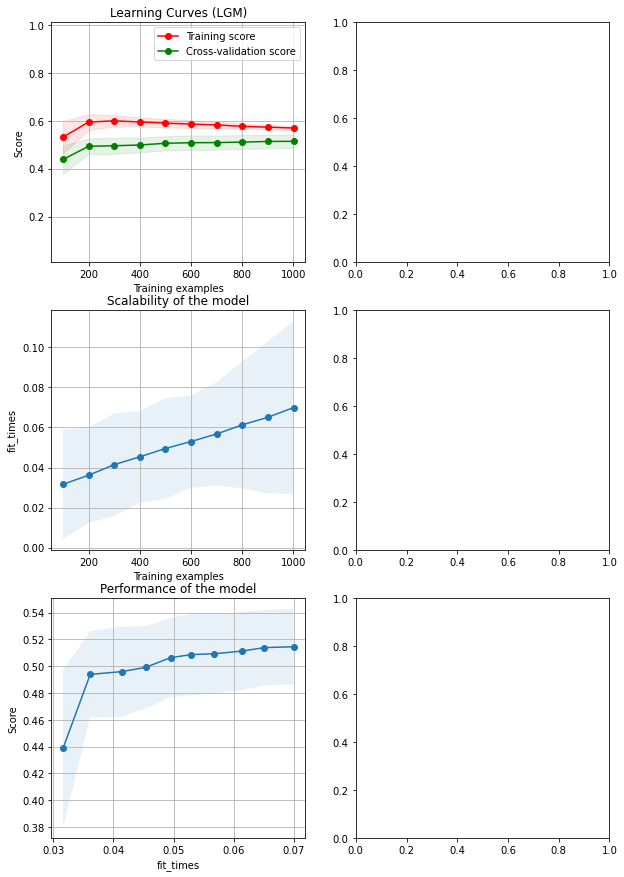

In [90]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (LGM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(clf, title, X_train, y_train, axes=axes[:, 0], ylim=(0.01, 1.01),
                    cv=cv, n_jobs=4)

plt.show()